# Doublets Phi & Z Distributions

In [6]:
import math
from math import pi as PI

In [7]:
import pandas

In [8]:
import numpy

In [9]:
import matplotlib.pyplot as plt

In [10]:
hits_df = []
truth_df = []
for i in range(10,99):
    hits_df.append(pandas.read_csv('event0000000' + str(i) + '-hits.csv'))
    truth_df.append(pandas.read_csv('event0000000' + str(i) + '-truth.csv'))

In [11]:
truth_all = pandas.concat(truth_df)

# Pt/P_i plots

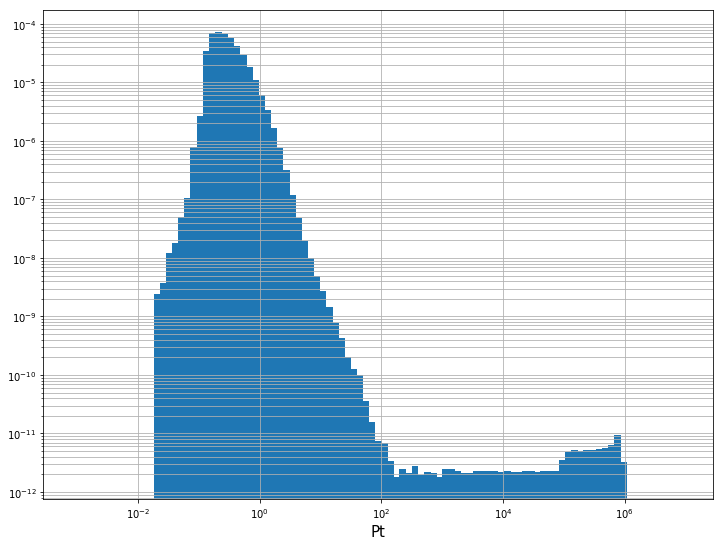

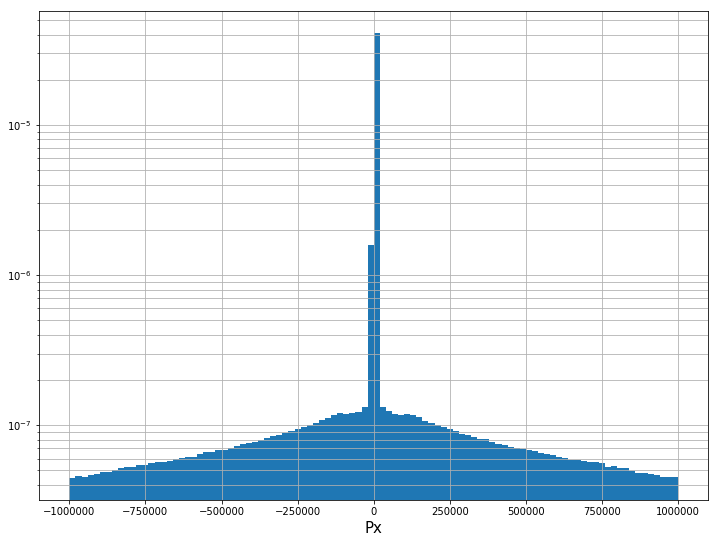

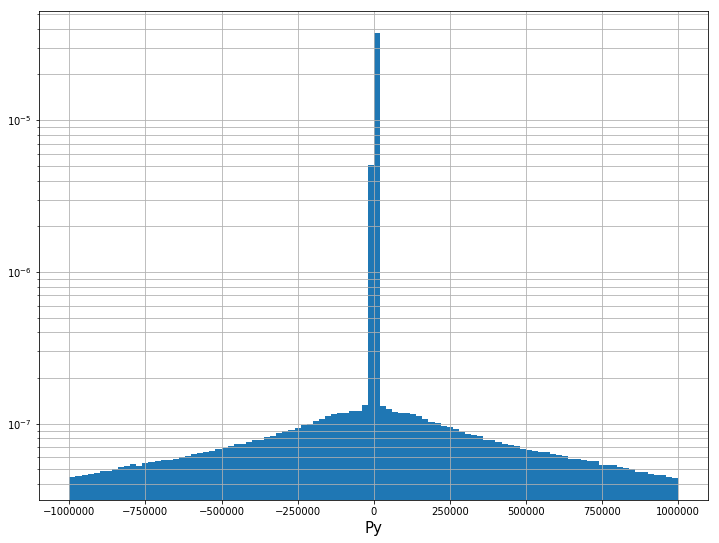

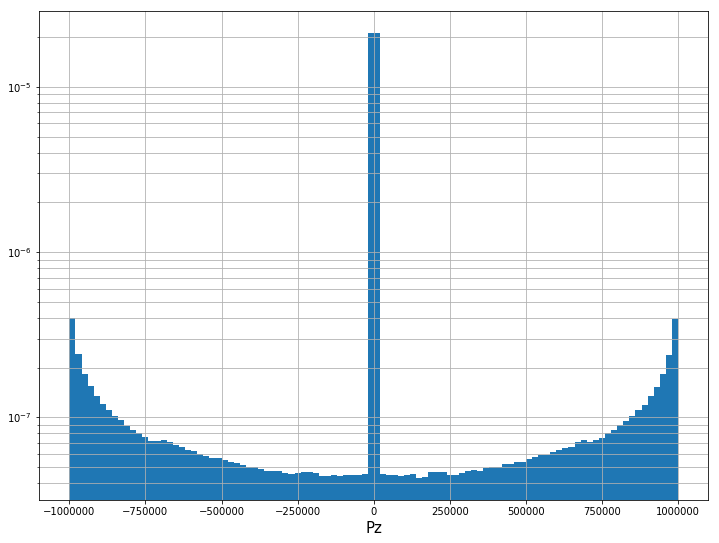

In [32]:
plt.figure(figsize=(12,9))
bins = numpy.logspace(-3, 7, 100)
widths = (bins[1:] - bins[:-1])
hist = numpy.histogram(truth_all["tpt"], bins=bins,normed=True)
hist_norm = hist[0]/widths
plt.bar(bins[:-1], hist_norm, widths)
#plt.hist(truth_all["tpt"],bins=200,range=[1e-2,1e6],log=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Pt",fontsize=15)
plt.grid()
plt.grid(which='minor')
plt.show()
plt.figure(figsize=(12,9))
plt.hist(truth_all["tpx"],log=True,bins=100,normed=True)
plt.grid()
plt.grid(which='minor')
plt.xlabel("Px",fontsize=15)
plt.show()
plt.figure(figsize=(12,9))
plt.hist(truth_all["tpy"],log=True,bins=100,normed=True)
plt.grid()
plt.grid(which='minor')
plt.xlabel("Py",fontsize=15)
plt.show()
plt.figure(figsize=(12,9))
plt.hist(truth_all["tpz"],log=True,bins=100,normed=True)
plt.grid()
plt.grid(which='minor')
plt.xlabel("Pz",fontsize=15)
plt.show()

In [12]:
#true barrel hits single event
hits = hits_df[0]
truth = truth_df[0]

tpt = numpy.sqrt(truth["tpx"].values**2 + truth["tpy"].values**2)
truth['tpt'] = pandas.Series(tpt, index=truth.index)

pixel_barrel_hits = hits[hits["volume_id"]==8]

phis = numpy.arctan2(pixel_barrel_hits["y"].values, pixel_barrel_hits["x"].values)
pixel_barrel_hits['phi'] = pandas.Series(phis, index=pixel_barrel_hits.index)
pixel_barrel_hits['px'] = pixel_barrel_hits['hit_id'].map(truth.set_index('hit_id')['tpx'])
pixel_barrel_hits['py'] = pixel_barrel_hits['hit_id'].map(truth.set_index('hit_id')['tpy'])
pixel_barrel_hits['pz'] = pixel_barrel_hits['hit_id'].map(truth.set_index('hit_id')['tpz'])
pixel_barrel_hits['pt'] = pixel_barrel_hits['hit_id'].map(truth.set_index('hit_id')['tpt'])
pixel_barrel_hits['particle_id'] = pandas.Series(numpy.zeros(pixel_barrel_hits.values.shape[0]), index=pixel_barrel_hits.index)
pixel_barrel_hits['particle_id'] = pixel_barrel_hits['hit_id'].map(truth.set_index('hit_id')['particle_id'])
pixel_barrel_hits = pixel_barrel_hits[pixel_barrel_hits['particle_id']!=0.0]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [13]:
tpt = numpy.sqrt(numpy.power(truth_all["tpx"].values,2) + numpy.power(truth_all["tpy"].values,2))
truth_all['tpt'] = pandas.Series(tpt, index=truth_all.index)

truth_all.head(n=10)

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,tpt
0,1,4508066393358336,-68.2463,-8.87805,-1502.5,-0.272695,-0.054860,-6.14960,0.278159
1,2,684548449030373376,-54.6234,-8.19412,-1502.5,-0.482333,-0.089869,-13.48850,0.490634
2,3,689053766644662272,-50.3249,-6.76819,-1502.5,-0.314294,-0.026351,-9.40569,0.315397
3,4,693559496575811584,-68.2045,-12.29430,-1502.5,-0.517816,-0.072843,-11.37790,0.522914
4,5,851185277375348736,-34.3388,4.20345,-1502.5,-0.488343,0.071558,-21.49160,0.493558
5,6,135110256563847168,-91.3413,-12.38800,-1502.5,-0.329131,-0.074361,-5.52938,0.337427
6,7,22527000388304896,-29.5255,-8.04520,-1502.5,-0.182553,-0.038264,-9.26749,0.186520
7,8,18014535948435456,-36.7016,-5.29344,-1502.5,-0.321271,-0.036104,-13.15900,0.323293
8,9,635008784409821184,-32.9194,-8.87226,-1502.5,-0.181354,-0.061217,-8.42946,0.191407
9,10,279233965854818304,-78.0351,-13.06190,-1502.5,-0.791152,-0.152841,-15.50610,0.805780


In [14]:
truth_all.shape[0]

10290752

In [ ]:
plt.hist(truth_df[0]["tpx"],log=True)
#plt.semilogx()
plt.show()

# Building True Doublets

In [60]:
bPix_1_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==2]
bPix_2_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==4]
bPix_3_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==6]
bPix_4_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==8]
bPix_1_hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,phi,px,py,pz,particle_id
15100,15101,-4.85562,-31.7113,-456.326,8,2,4,-1.722736,-0.381644,-0.478883,-1.087050,157627911120097281
15103,15104,18.12010,-26.6336,-467.611,8,2,6,-0.973382,0.116931,-0.170100,0.245527,630505803274526722
15105,15106,19.11210,-25.7475,-489.274,8,2,6,-0.932248,0.072523,-0.287138,0.146570,99083864743350273
15106,15107,25.52910,-20.5855,-438.020,8,2,7,-0.678604,0.416126,-0.138850,-0.191747,378302574874333185
15108,15109,29.06080,15.4027,-451.939,8,2,10,0.487371,0.182026,0.314142,-1.049310,157627911120101378


In [61]:
colsIn = [ "in_" + el for el in bPix_1_hits.columns[:-1]]
colsIn.extend(["particle_id"])
colsOut = [ "out_" + el for el in bPix_1_hits.columns[:-1]]
colsOut.extend(["particle_id"])

bPix_1_hits_in = bPix_1_hits.copy()
bPix_1_hits_in.columns = colsIn

bPix_2_hits_out = bPix_2_hits.copy()
bPix_2_hits_out.columns = colsOut

bPix_2_hits_in = bPix_2_hits.copy()
bPix_2_hits_in.columns = colsIn

bPix_3_hits_out = bPix_3_hits.copy()
bPix_3_hits_out.columns = colsOut

bPix_3_hits_in = bPix_3_hits.copy()
bPix_3_hits_in.columns = colsIn

bPix_4_hits_out = bPix_4_hits.copy()
bPix_4_hits_out.columns = colsOut

bPix_4_hits_in = bPix_4_hits.copy()
bPix_4_hits_in.columns = colsIn

In [62]:
bPix_1_2_doublets = pandas.merge(bPix_1_hits_in, bPix_2_hits_out, how='right')
bPix_1_2_doublets = bPix_1_2_doublets[numpy.logical_not(numpy.isnan(bPix_1_2_doublets["in_x"]))]
bPix_2_3_doublets = pandas.merge(bPix_2_hits_in, bPix_3_hits_out, how='right')
bPix_2_3_doublets = bPix_2_3_doublets[numpy.logical_not(numpy.isnan(bPix_2_3_doublets["in_x"]))]
bPix_3_4_doublets = pandas.merge(bPix_3_hits_in, bPix_4_hits_out, how='right')
bPix_3_4_doublets = bPix_3_4_doublets[numpy.logical_not(numpy.isnan(bPix_3_4_doublets["in_x"]))]
doublets_true = [bPix_1_2_doublets,bPix_2_3_doublets,bPix_3_4_doublets]
bPix_3_4_doublets.head()

,in_hit_id,in_x,in_y,in_z,in_volume_id,in_layer_id,in_module_id,in_phi,in_px,in_py,...,out_x,out_y,out_z,out_volume_id,out_layer_id,out_module_id,out_phi,out_px,out_py,out_pz
0,27521.0,-91.9042,-71.31430,-445.739,8.0,6.0,6.0,-2.481681,-0.231599,-0.152413,...,-141.0010,-98.6724,-471.396,8,8,8,-2.531001,-0.250410,-0.120393,-0.126032
1,27561.0,46.5671,-106.73000,-447.966,8.0,6.0,17.0,-1.159387,0.118568,-0.271927,...,71.5349,-156.0420,-421.834,8,8,25,-1.140951,0.148880,-0.256746,0.140348
2,27574.0,76.9765,-86.02060,-433.753,8.0,6.0,19.0,-0.840828,-0.054919,0.173724,...,88.3327,-148.1000,-407.693,8,8,105,-1.032999,-0.014147,0.183329,-0.075601
3,27594.0,101.0140,-56.55950,-467.995,8.0,6.0,22.0,-0.510425,0.400522,-0.190659,...,150.6190,-82.5413,-451.347,8,8,33,-0.501317,0.384013,-0.220234,0.131483
4,27612.0,115.9690,-6.15419,-446.319,8.0,6.0,26.0,-0.053018,0.210430,-0.044850,...,170.5340,-22.5892,-407.708,8,8,116,-0.131695,0.199857,-0.077938,0.145615


In [13]:
delta_phis_true = []
for d in doublets_true:
    
    phi_in = d["in_phi"].values
    phi_out = d["out_phi"].values

    phi_in[phi_in<0.0] += 2*PI
    phi_out[phi_out<0.0] += 2*PI

    delta_phi = phi_in - phi_out

    delta_phi[abs(delta_phi)>PI] = 2*PI - abs(delta_phi[abs(delta_phi)>PI])
    delta_phis_true.append(delta_phi)

In [14]:
delta_zs_true = []
for d in doublets_true:
    
    z_in = d["in_z"].values
    z_out = d["out_z"].values

    z_in[z_in<0.0] += 2*PI
    z_out[z_out<0.0] += 2*PI

    delta_z = z_in - z_out

    #delta_z[abs(delta_z)>PI] = 2*PI - abs(delta_phi[abs(delta_z)>PI])
    delta_zs_true.append(delta_z)

# Building Combinatorial Doublets

In [122]:
pixel_barrel_hits_comb = hits[hits["volume_id"]==8]
pixel_barrel_hits_comb["layer_id"].value_counts()
phis = numpy.arctan2(pixel_barrel_hits_comb["y"].values, pixel_barrel_hits_comb["x"].values)
pixel_barrel_hits_comb['phi'] = pandas.Series(phis, index=pixel_barrel_hits_comb.index)
pixel_barrel_hits_comb['particle_id'] = 0.0
pixel_barrel_hits_comb['particle_id'] = pixel_barrel_hits_comb['hit_id'].map(truth.set_index('hit_id')['particle_id'])
pixel_barrel_hits_comb['key'] = 1.0

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [123]:
bPix_1_hits_comb = pixel_barrel_hits_comb[pixel_barrel_hits_comb["layer_id"]==2]
bPix_2_hits_comb = pixel_barrel_hits_comb[pixel_barrel_hits_comb["layer_id"]==4]
bPix_3_hits_comb = pixel_barrel_hits_comb[pixel_barrel_hits_comb["layer_id"]==6]
bPix_4_hits_comb = pixel_barrel_hits_comb[pixel_barrel_hits_comb["layer_id"]==8]
bPix_1_hits_comb.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,phi,particle_id,key
17334,17335,-31.1870,-7.55949,-441.097,8,2,1,-2.903787,364792394467520514,1.0
17335,17336,-22.7056,-22.51780,-451.127,8,2,2,-2.360347,405336610863849474,1.0
17336,17337,-27.2169,-17.46700,-435.821,8,2,2,-2.571025,0,1.0
17337,17338,-21.0522,-25.30420,-448.149,8,2,3,-2.264726,0,1.0
17338,17339,-20.2666,-25.68270,-461.533,8,2,3,-2.238865,0,1.0


In [124]:
colsIn = [ "in_" + el for el in bPix_1_hits_comb.columns[:-1]]
colsIn.extend(["key"])
colsOut = [ "out_" + el for el in bPix_1_hits_comb.columns[:-1]]
colsOut.extend(["key"])

bPix_1_hits_comb_in = bPix_1_hits_comb.copy()
bPix_1_hits_comb_in.columns = colsIn

bPix_2_hits_comb_out = bPix_2_hits_comb.copy()
bPix_2_hits_comb_out.columns = colsOut

bPix_2_hits_comb_in = bPix_2_hits_comb.copy()
bPix_2_hits_comb_in.columns = colsIn

bPix_3_hits_comb_out = bPix_3_hits_comb.copy()
bPix_3_hits_comb_out.columns = colsOut

bPix_3_hits_comb_in = bPix_3_hits_comb.copy()
bPix_3_hits_comb_in.columns = colsIn

bPix_4_hits_comb_out = bPix_4_hits_comb.copy()
bPix_4_hits_comb_out.columns = colsOut

bPix_4_hits_comb_in = bPix_4_hits_comb.copy()
bPix_4_hits_comb_in.columns = colsIn

In [125]:
bPix_2_hits_comb_in.head()

,in_hit_id,in_x,in_y,in_z,in_volume_id,in_layer_id,in_module_id,in_phi,in_particle_id,key
24906,24907,-70.4693,-12.98320,-470.506,8,4,1,-2.959397,0,1.0
24907,24908,-70.8424,-11.44670,-424.965,8,4,1,-2.981397,869195827594133504,1.0
24908,24909,-71.3396,-9.39850,-483.195,8,4,1,-3.010604,198165049393545216,1.0
24909,24910,-72.7519,-3.58151,-446.637,8,4,1,-3.092403,580965588881375232,1.0
24910,24911,-73.0381,-2.40258,-435.722,8,4,1,-3.108710,49548460713574400,1.0


In [126]:
bPix_1_2_doublets_comb = pandas.merge(bPix_1_hits_comb_in,bPix_2_hits_comb_out,on='key').drop('key',axis=1)

In [127]:
bPix_2_3_doublets_comb = pandas.merge(bPix_2_hits_comb_in,bPix_3_hits_comb_out,on='key').drop('key',axis=1)

In [128]:
bPix_3_4_doublets_comb = pandas.merge(bPix_3_hits_comb_in,bPix_4_hits_comb_out,on='key').drop('key',axis=1)

In [235]:
doublets = [bPix_1_2_doublets_comb,bPix_2_3_doublets_comb,bPix_3_4_doublets_comb]

In [131]:
bPix_1_2_doublets_comb.head()

,in_hit_id,in_x,in_y,in_z,in_volume_id,in_layer_id,in_module_id,in_phi,in_particle_id,out_hit_id,out_x,out_y,out_z,out_volume_id,out_layer_id,out_module_id,out_phi,out_particle_id
0,17335,-31.187,-7.55949,-441.097,8,2,1,-2.903787,364792394467520514,24907,-70.4693,-12.98320,-470.506,8,4,1,-2.959397,0
1,17335,-31.187,-7.55949,-441.097,8,2,1,-2.903787,364792394467520514,24908,-70.8424,-11.44670,-424.965,8,4,1,-2.981397,869195827594133504
2,17335,-31.187,-7.55949,-441.097,8,2,1,-2.903787,364792394467520514,24909,-71.3396,-9.39850,-483.195,8,4,1,-3.010604,198165049393545216
3,17335,-31.187,-7.55949,-441.097,8,2,1,-2.903787,364792394467520514,24910,-72.7519,-3.58151,-446.637,8,4,1,-3.092403,580965588881375232
4,17335,-31.187,-7.55949,-441.097,8,2,1,-2.903787,364792394467520514,24911,-73.0381,-2.40258,-435.722,8,4,1,-3.108710,49548460713574400


In [132]:
delta_phis = []
for d in doublets:
    
    phi_in = d["in_phi"].values
    phi_out = d["out_phi"].values

    phi_in[phi_in<0.0] += 2*PI
    phi_out[phi_out<0.0] += 2*PI

    delta_phi = phi_in - phi_out

    delta_phi[abs(delta_phi)>PI] = 2*PI - abs(delta_phi[abs(delta_phi)>PI])
    delta_phis.append(delta_phi)

In [133]:
delta_zs = []
for d in doublets:
    
    z_in = d["in_z"].values
    z_out = d["out_z"].values

    z_in[z_in<0.0] += 2*PI
    z_out[z_out<0.0] += 2*PI

    delta_z = z_in - z_out

    #delta_z[abs(delta_z)>PI] = 2*PI - abs(delta_phi[abs(delta_z)>PI])
    delta_zs.append(delta_z)

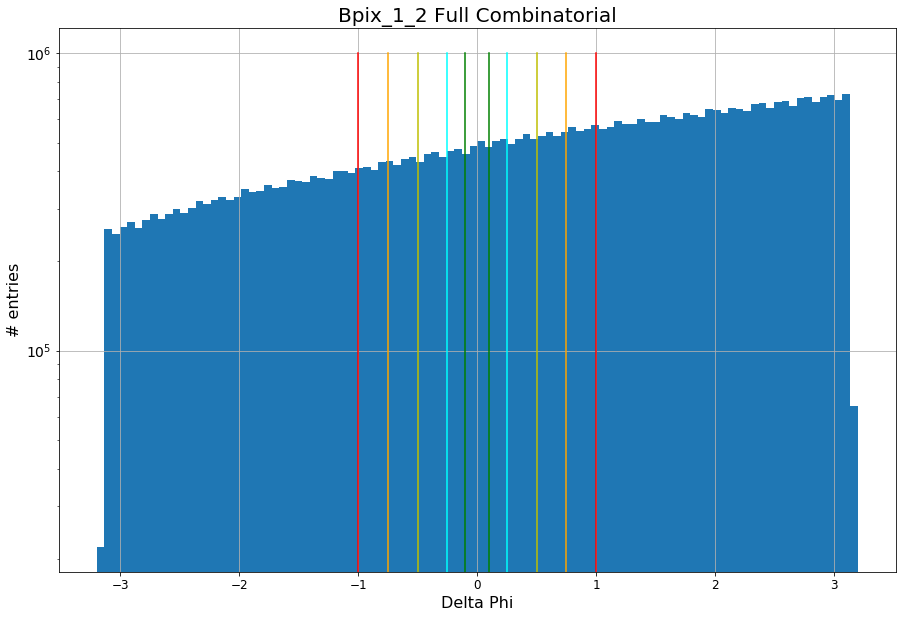

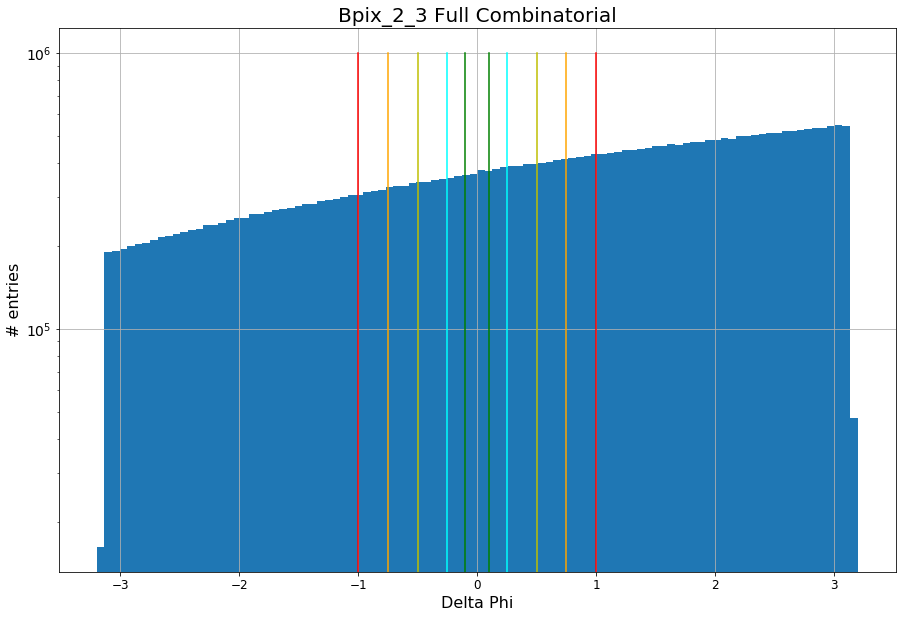

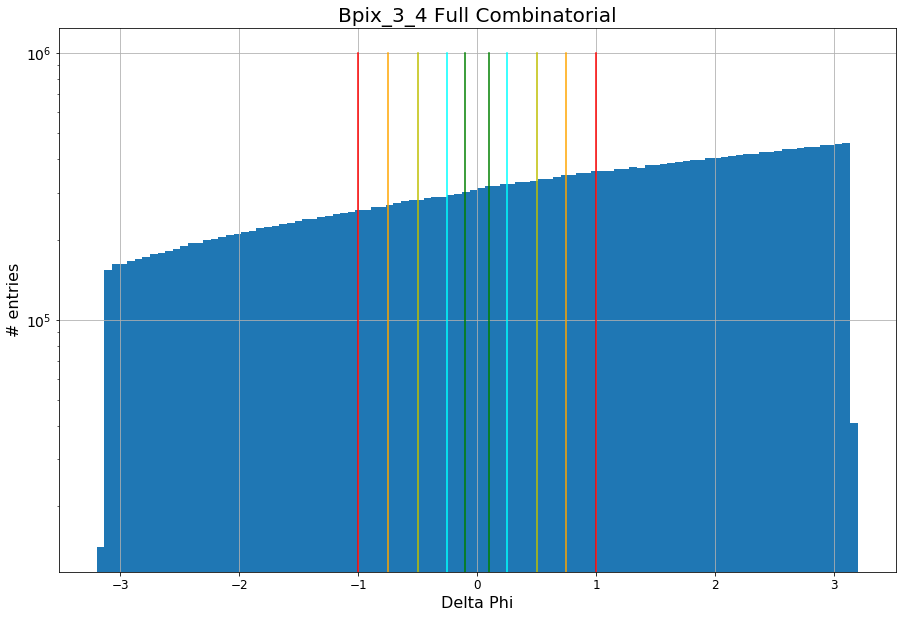

In [134]:
labels = ["Bpix_1_2 Full Combinatorial","Bpix_2_3 Full Combinatorial","Bpix_3_4 Full Combinatorial"]
cuts = [1.0,0.75,0.5,0.25,0.1]
zcuts = [280.0,190.0,170.0]
zcolors = ["r","orange","green"]
colors = ["r","orange","y","cyan","green"]
for d,l in zip(delta_phis,labels):
    plt.figure(figsize=(15,10))
    nphiDeltaF,bphiDeltaF,_ = plt.hist(d,bins=100,range=[-3.2,3.2],label=l,log=True)
    for c,col in zip(cuts,colors):   
        plt.plot([-c,-c],[0.0,1e6],color=col)
        plt.plot([c,c],[0.0,1e6],color=col)
    plt.title(l,fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel("Delta Phi",fontsize=16)
    plt.ylabel("# entries",fontsize=16)
    plt.grid()
    plt.show()

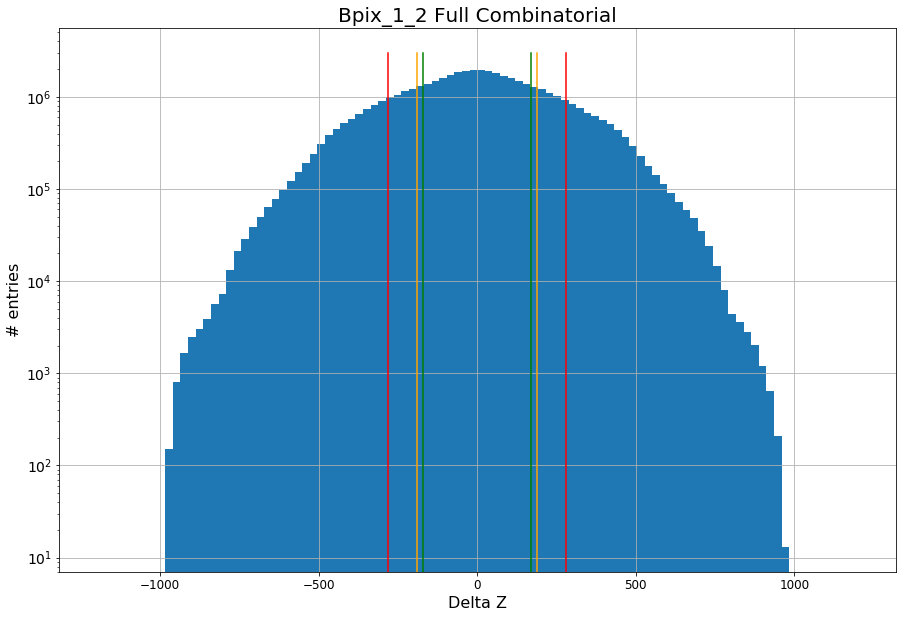

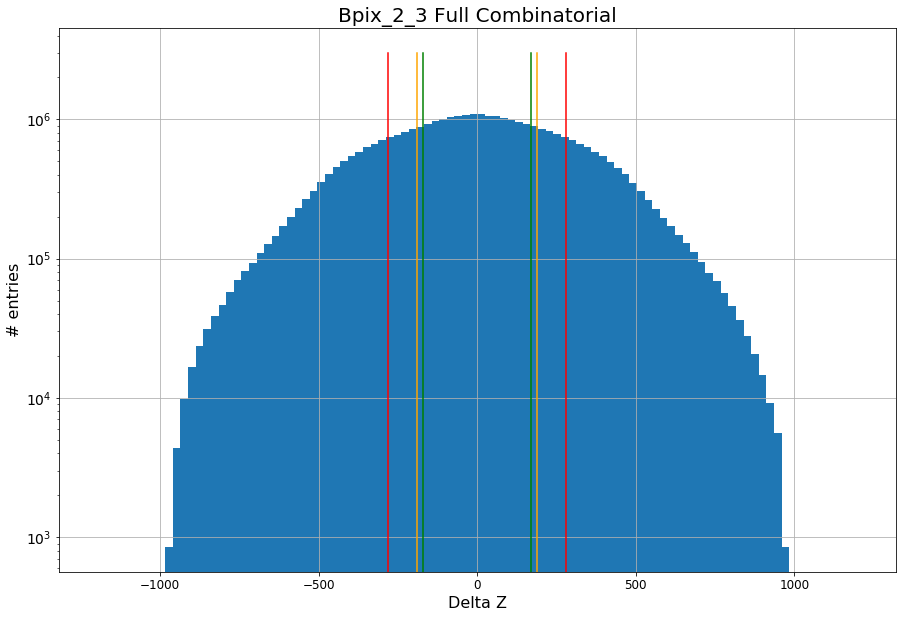

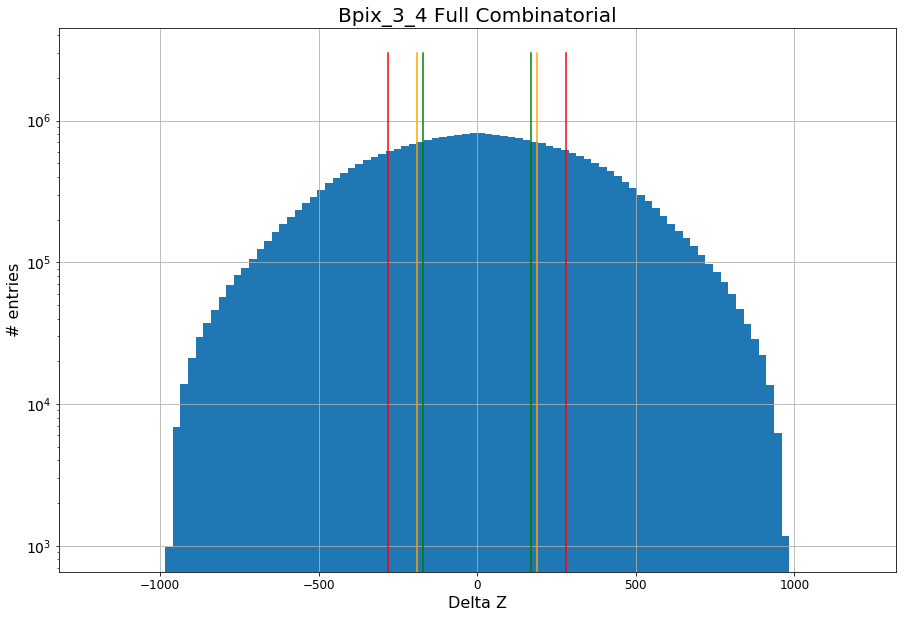

In [135]:
for d,l in zip(delta_zs,labels):
    plt.figure(figsize=(15,10))
    nphiDeltaF,bphiDeltaF,_ = plt.hist(d,bins=100,range=[-1200.0,1200.0],label=l,log=True)
    for c,col in zip(zcuts,zcolors):   
        plt.plot([-c,-c],[0.0,3e6],color=col)
        plt.plot([c,c],[0.0,3e6],color=col)
    plt.title(l,fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel("Delta Z",fontsize=16)
    plt.ylabel("# entries",fontsize=16)
    plt.grid()
    plt.show()

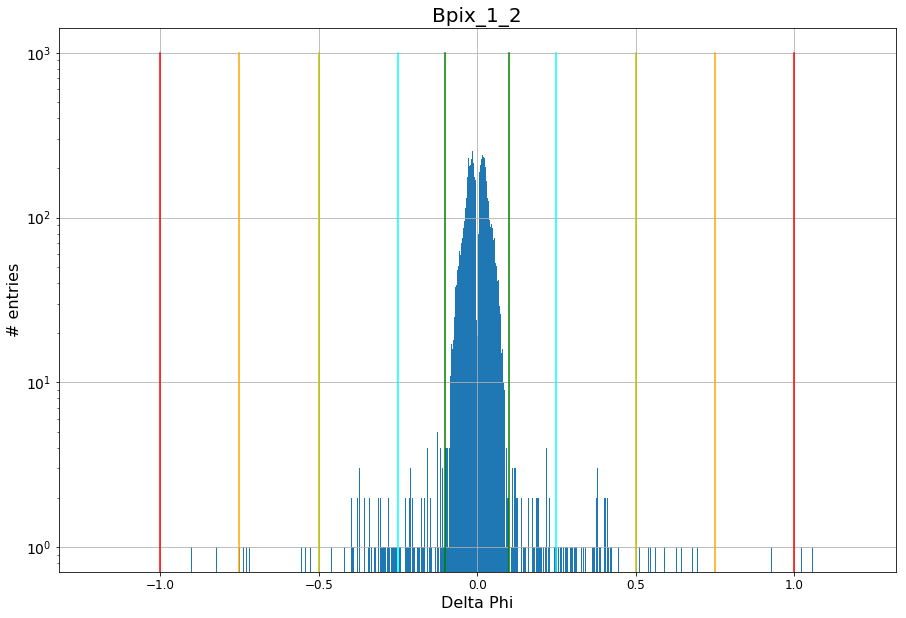

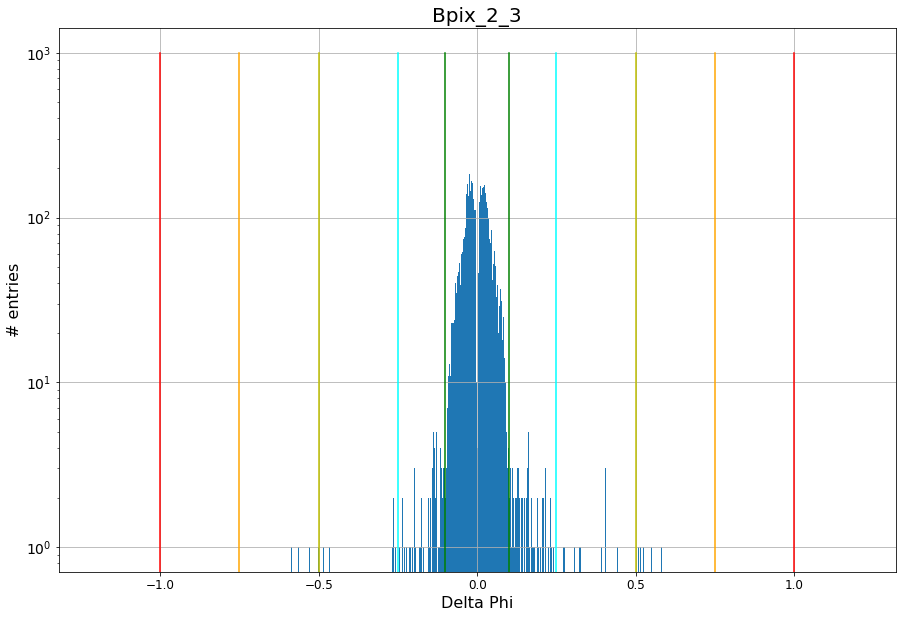

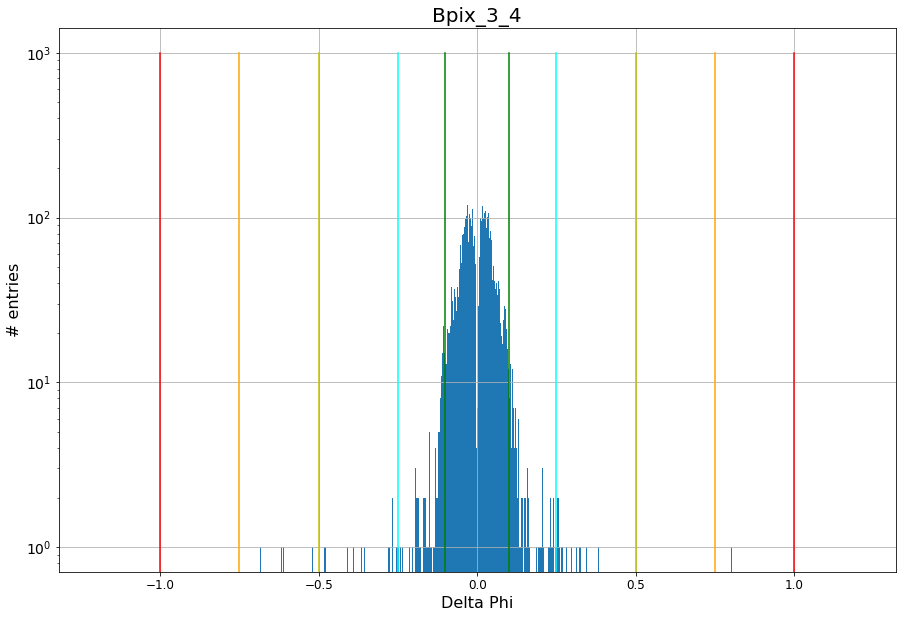

In [308]:
labels_true = ["Bpix_1_2","Bpix_2_3","Bpix_3_4"]
for d,l in zip(delta_phis_true,labels_true):
    plt.figure(figsize=(15,10))
    nphiDeltaF,bphiDeltaF,_ = plt.hist(d,bins=1000,range=[-1.2,1.2],label=l,log=True)
    for c,col in zip(cuts,colors):   
        plt.plot([-c,-c],[0.0,1e3],color=col)
        plt.plot([c,c],[0.0,1e3],color=col)
    plt.title(l,fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel("Delta Phi",fontsize=16)
    plt.ylabel("# entries",fontsize=16)
    plt.grid()
    plt.show()

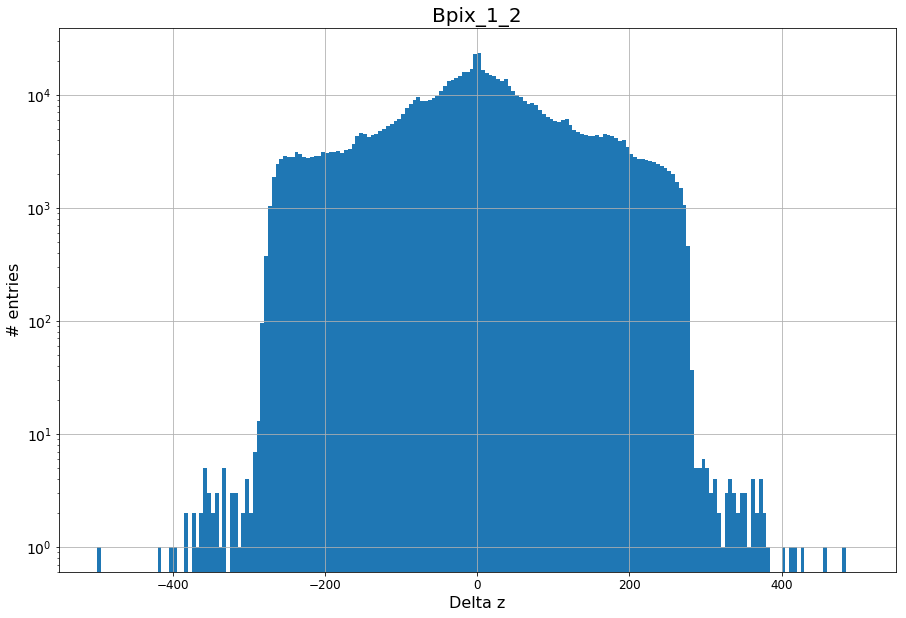

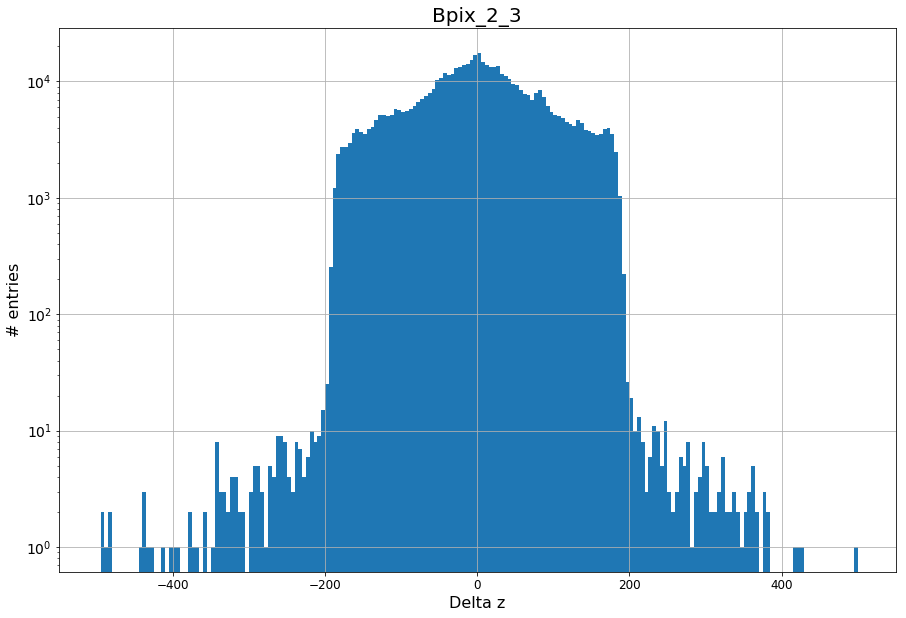

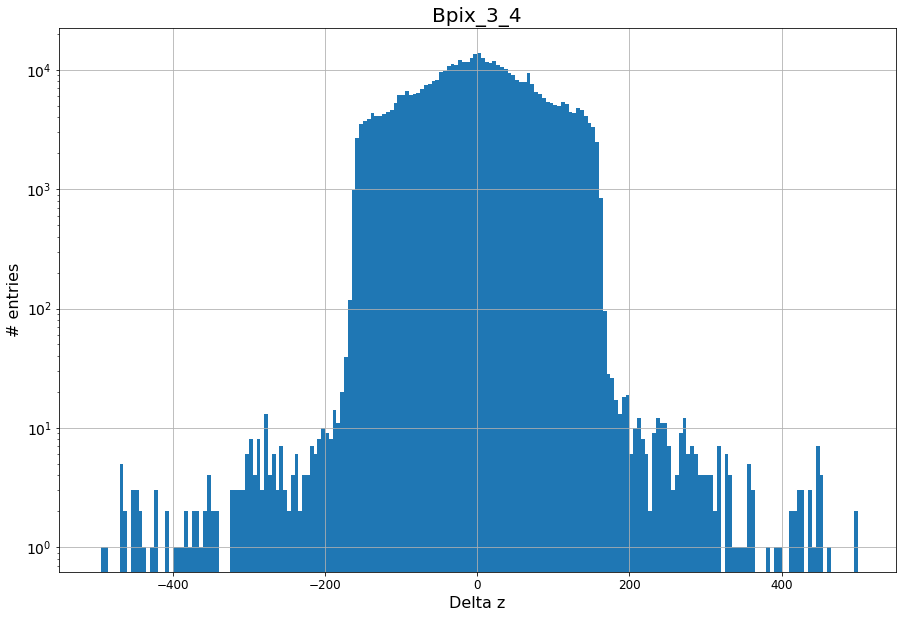

In [46]:
labels_true = ["Bpix_1_2","Bpix_2_3","Bpix_3_4"]
for d,l in zip(delta_zs_true,labels_true):
    plt.figure(figsize=(15,10))
    nphiDeltaF,bphiDeltaF,_ = plt.hist(d,range=[-500.,+500.],bins=200,label=l,log=True)
    #for c,col in zip(zcuts,zcolors):   
        #plt.plot([-c,-c],[0.0,1e3],color=col)
        #plt.plot([c,c],[0.0,1e3],color=col)
    plt.title(l,fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel("Delta z",fontsize=16)
    plt.ylabel("# entries",fontsize=16)
    plt.grid()
    plt.show()

In [277]:
for d,l in zip(delta_phis_true,labels_true):
    print("==== " + l)
    print("Tot true doublets = " + str(d.shape[0]))
    for c in cuts:
        dd = d[abs(d)<c]
        print("Phi cut @ %.2f retained: %.2f %%"% (c,float(dd.shape[0])/float(d.shape[0])*100.))

==== Bpix_1_2
Tot true doublets = 7738
Phi cut @ 1.00 retained: 99.64 %
Phi cut @ 0.75 retained: 99.57 %
Phi cut @ 0.50 retained: 99.32 %
Phi cut @ 0.25 retained: 98.10 %
Phi cut @ 0.10 retained: 96.30 %
==== Bpix_2_3
Tot true doublets = 5898
Phi cut @ 1.00 retained: 99.90 %
Phi cut @ 0.75 retained: 99.90 %
Phi cut @ 0.50 retained: 99.71 %
Phi cut @ 0.25 retained: 99.34 %
Phi cut @ 0.10 retained: 96.52 %
==== Bpix_3_4
Tot true doublets = 4968
Phi cut @ 1.00 retained: 99.82 %
Phi cut @ 0.75 retained: 99.80 %
Phi cut @ 0.50 retained: 99.68 %
Phi cut @ 0.25 retained: 99.03 %
Phi cut @ 0.10 retained: 92.69 %


In [288]:
labels_true = ["Bpix_1_2","Bpix_2_3","Bpix_3_4"]
cuts = [1.0,0.75,0.5,0.25,0.1]
for d,dt,l in zip(delta_phis,delta_phis_true,labels_true):
    print("\n==== " + l + "\n")
    print("Tot combinatorial doublets = " + str(d.shape[0]))
    print("Tot true doublets          = " + str(dt.shape[0]) + "\n")
    for c in cuts:
        dd  = d[abs(d)<c]
        ddt = dt[abs(dt)<c]
        print("Phi cut @ %.2f" % (c))
        print(" - Fake rejected: %.2f %%"% ( (1.0-(float(dd.shape[0])/float(d.shape[0])))*100.))
        print(" - True retained: %.2f %%"% (float(ddt.shape[0])/float(dt.shape[0])*100.))
    


==== Bpix_1_2

Tot combinatorial doublets = 48494289
Tot true doublets          = 7738

Phi cut @ 1.00
 - Fake rejected: 68.10 %
 - True retained: 99.64 %
Phi cut @ 0.75
 - Fake rejected: 76.10 %
 - True retained: 99.57 %
Phi cut @ 0.50
 - Fake rejected: 84.02 %
 - True retained: 99.32 %
Phi cut @ 0.25
 - Fake rejected: 91.98 %
 - True retained: 98.10 %
Phi cut @ 0.10
 - Fake rejected: 96.77 %
 - True retained: 96.30 %

==== Bpix_2_3

Tot combinatorial doublets = 36662172
Tot true doublets          = 5898

Phi cut @ 1.00
 - Fake rejected: 68.11 %
 - True retained: 99.90 %
Phi cut @ 0.75
 - Fake rejected: 76.06 %
 - True retained: 99.90 %
Phi cut @ 0.50
 - Fake rejected: 84.02 %
 - True retained: 99.71 %
Phi cut @ 0.25
 - Fake rejected: 91.99 %
 - True retained: 99.34 %
Phi cut @ 0.10
 - Fake rejected: 96.78 %
 - True retained: 96.52 %

==== Bpix_3_4

Tot combinatorial doublets = 29706548
Tot true doublets          = 4968

Phi cut @ 1.00
 - Fake rejected: 68.14 %
 - True retained: 99.8

In [341]:
phicut = 0.75
zcuts = [280.0,190.0,170.0]
for p,pt,d,dt,l in zip(delta_phis,delta_phis_true,delta_zs,delta_zs_true,labels_true):
    dd   = d[abs(p)<phicut]
    ddt  = dt[abs(pt)<phicut]
    print("\n==== " + l + "\n")
    print("PHI CUT %.2f" % (phicut))
    print("Tot combinatorial doublets = " + str(dd.shape[0]))
    print("Tot true doublets          = " + str(ddt.shape[0]) + "\n")
    for c in zcuts:
        ddd  = dd[abs(dd)<c]
        dddt = ddt[abs(ddt)<c]
        print("Z cut @ %.2f" % (c))
        print(" - Fake rejected: %.2f %%"% ( (1.0-(float(ddd.shape[0])/float(dd.shape[0])))*100.))
        print(" - True retained: %.2f %%"% (float(dddt.shape[0])/float(ddt.shape[0])*100.))
    


==== Bpix_1_2

PHI CUT 0.75
Tot combinatorial doublets = 11590193
Tot true doublets          = 7705

Z cut @ 280.00
 - Fake rejected: 27.82 %
 - True retained: 99.90 %
Z cut @ 190.00
 - Fake rejected: 44.89 %
 - True retained: 86.81 %
Z cut @ 170.00
 - Fake rejected: 49.35 %
 - True retained: 82.65 %

==== Bpix_2_3

PHI CUT 0.75
Tot combinatorial doublets = 8777896
Tot true doublets          = 5892

Z cut @ 280.00
 - Fake rejected: 39.26 %
 - True retained: 100.00 %
Z cut @ 190.00
 - Fake rejected: 55.75 %
 - True retained: 99.97 %
Z cut @ 170.00
 - Fake rejected: 59.79 %
 - True retained: 96.13 %

==== Bpix_3_4

PHI CUT 0.75
Tot combinatorial doublets = 7106093
Tot true doublets          = 4958

Z cut @ 280.00
 - Fake rejected: 43.14 %
 - True retained: 100.00 %
Z cut @ 190.00
 - Fake rejected: 59.29 %
 - True retained: 100.00 %
Z cut @ 170.00
 - Fake rejected: 63.18 %
 - True retained: 99.96 %


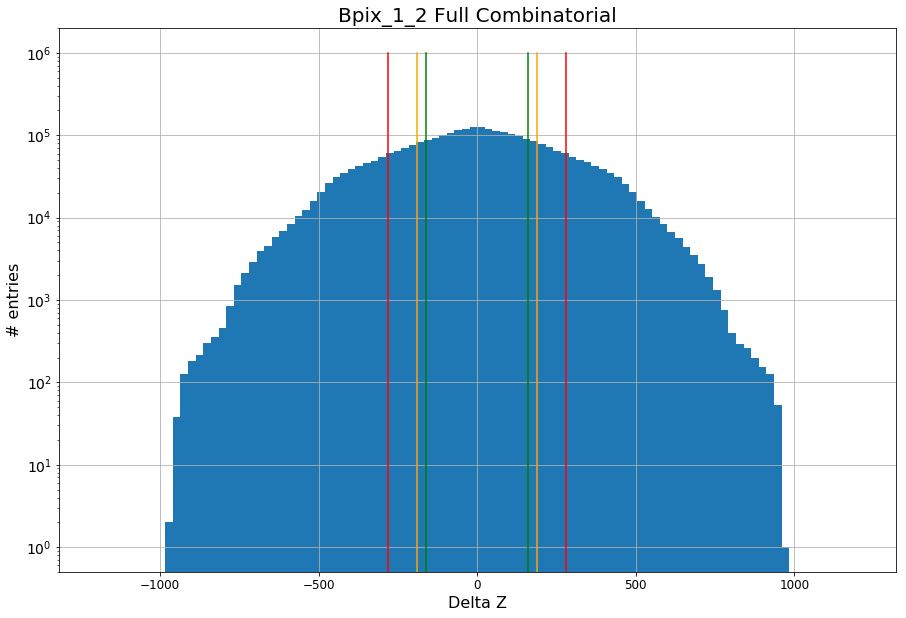

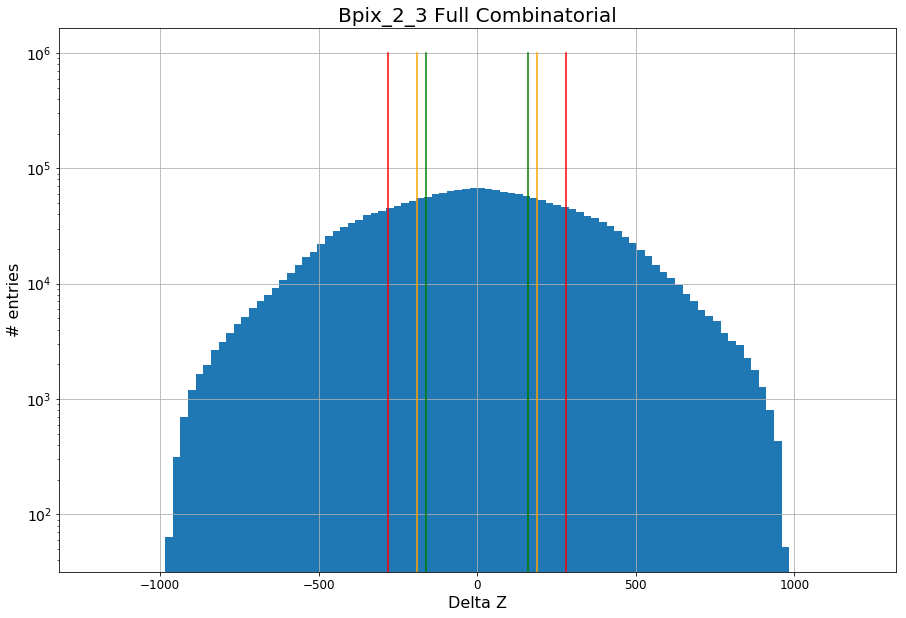

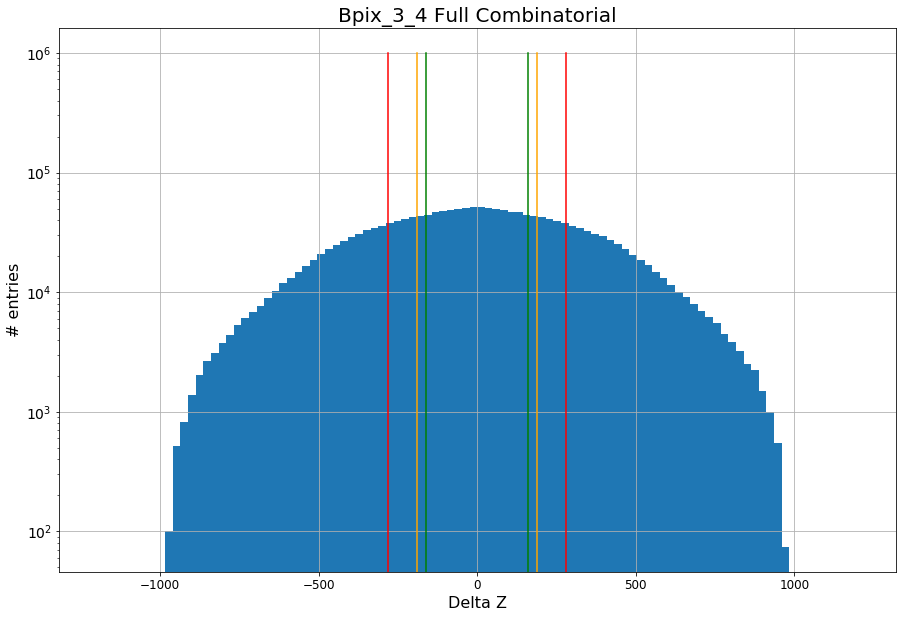

In [44]:
for d,p,l in zip(delta_zs,delta_phis,labels):
    dd = d[abs(p)<phicut]
    plt.figure(figsize=(15,10))
    nphiDeltaF,bphiDeltaF,_ = plt.hist(dd,bins=100,range=[-1200.0,1200.0],label=l,log=True)
    for c,col in zip(zcuts,zcolors):   
        plt.plot([-c,-c],[0.0,1e6],color=col)
        plt.plot([c,c],[0.0,1e6],color=col)
    plt.title(l,fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel("Delta Z",fontsize=16)
    plt.ylabel("# entries",fontsize=16)
    plt.grid()
    plt.show()

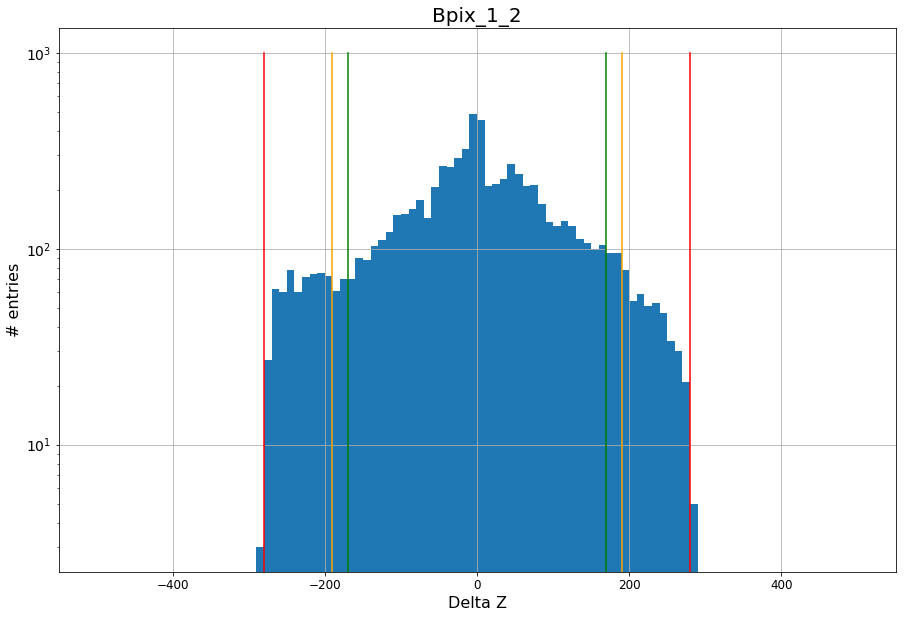

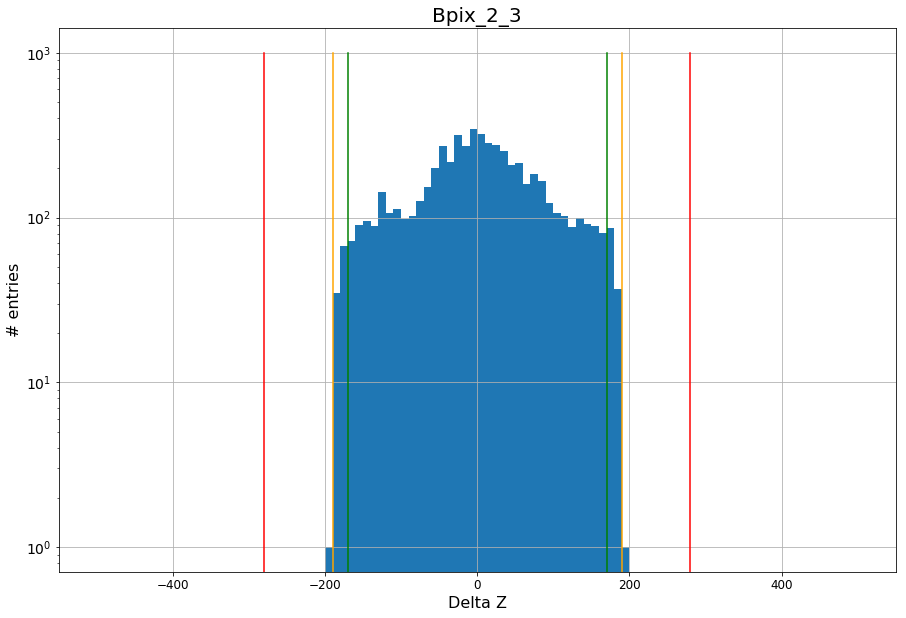

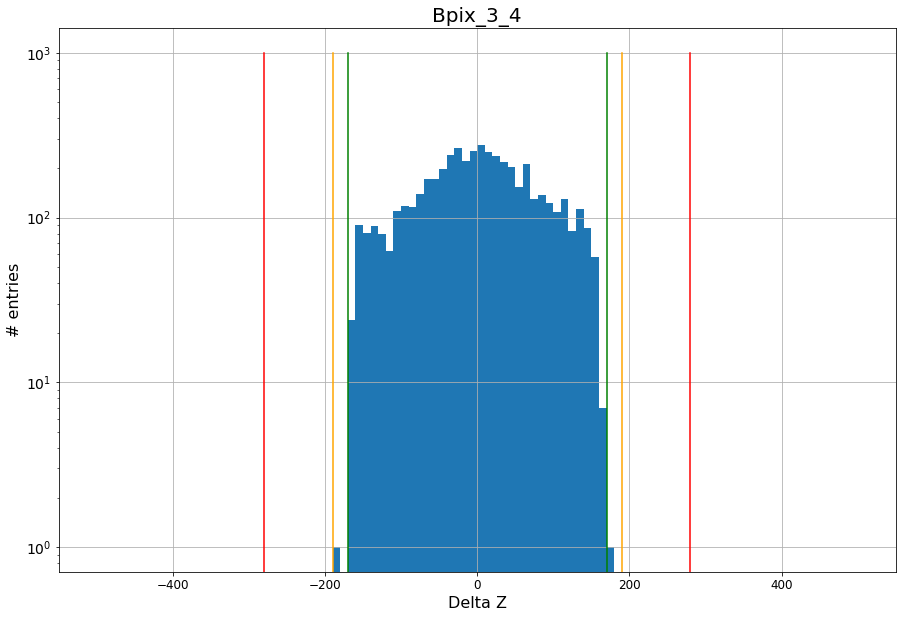

In [350]:
for d,p,l in zip(delta_zs_true,delta_phis_true,labels_true):
    dd = d[abs(p)<phicut]
    plt.figure(figsize=(15,10))
    nphiDeltaF,bphiDeltaF,_ = plt.hist(dd,bins=100,range=[-500.0,500.0],label=l,log=True)
    for c,col in zip(zcuts,zcolors):   
        plt.plot([-c,-c],[0.0,1e3],color=col)
        plt.plot([c,c],[0.0,1e3],color=col)
    plt.title(l,fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel("Delta Z",fontsize=16)
    plt.ylabel("# entries",fontsize=16)
    plt.grid()
    plt.show()

In [109]:
##multiple events

bPix_1_2_doublets_all = []
bPix_2_3_doublets_all = []
bPix_3_4_doublets_all = []

for i in range(len(hits_df)):
    #true barrel hits single event
    hits = hits_df[i]
    truth = truth_df[i]
    tpt = numpy.sqrt(numpy.power(truth["tpx"].values,2) + numpy.power(truth["tpy"].values,2))
    pixel_barrel_hits = hits[hits["volume_id"]==8]
    pixel_barrel_hits["layer_id"].value_counts()
    phis = numpy.arctan2(pixel_barrel_hits["y"].values, pixel_barrel_hits["x"].values)
    truth['tpt'] = pandas.Series(tpt, index=truth.index)
    pixel_barrel_hits['phi'] = pandas.Series(phis, index=pixel_barrel_hits.index)
    pixel_barrel_hits['tpt'] = pandas.Series(numpy.zeros(pixel_barrel_hits.values.shape[0]), index=pixel_barrel_hits.index)
    pixel_barrel_hits['particle_id'] = pandas.Series(numpy.zeros(pixel_barrel_hits.values.shape[0]), index=pixel_barrel_hits.index)
    pixel_barrel_hits['tpt'] = pixel_barrel_hits['hit_id'].map(truth.set_index('hit_id')['tpt'])
    pixel_barrel_hits['particle_id'] = pixel_barrel_hits['hit_id'].map(truth.set_index('hit_id')['particle_id'])
    pixel_barrel_hits = pixel_barrel_hits[pixel_barrel_hits['particle_id']!=0.0]
    #pixel_barrel_hist_all.append(pixel_barrel_hits)
    
    bPix_1_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==2]
    bPix_2_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==4]
    bPix_3_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==6]
    bPix_4_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==8]
    
    colsIn = [ "in_" + el for el in bPix_1_hits.columns[:-1]]
    colsIn.extend(["particle_id"])
    colsOut = [ "out_" + el for el in bPix_1_hits.columns[:-1]]
    colsOut.extend(["particle_id"])
    print colsIn

    bPix_1_hits_in = bPix_1_hits.copy()
    bPix_1_hits_in.columns = colsIn

    bPix_2_hits_out = bPix_2_hits.copy()
    bPix_2_hits_out.columns = colsOut

    bPix_2_hits_in = bPix_2_hits.copy()
    bPix_2_hits_in.columns = colsIn

    bPix_3_hits_out = bPix_3_hits.copy()
    bPix_3_hits_out.columns = colsOut

    bPix_3_hits_in = bPix_3_hits.copy()
    bPix_3_hits_in.columns = colsIn

    bPix_4_hits_out = bPix_4_hits.copy()
    bPix_4_hits_out.columns = colsOut

    bPix_4_hits_in = bPix_4_hits.copy()
    bPix_4_hits_in.columns = colsIn
    
    bPix_1_2_doublets = pandas.merge(bPix_1_hits_in, bPix_2_hits_out, how='right')
    bPix_1_2_doublets = bPix_1_2_doublets[numpy.logical_not(numpy.isnan(bPix_1_2_doublets["in_x"]))]
    bPix_2_3_doublets = pandas.merge(bPix_2_hits_in, bPix_3_hits_out, how='right')
    bPix_2_3_doublets = bPix_2_3_doublets[numpy.logical_not(numpy.isnan(bPix_2_3_doublets["in_x"]))]
    bPix_3_4_doublets = pandas.merge(bPix_3_hits_in, bPix_4_hits_out, how='right')
    bPix_3_4_doublets = bPix_3_4_doublets[numpy.logical_not(numpy.isnan(bPix_3_4_doublets["in_x"]))]
    #doublets_true = [bPix_1_2_doublets,bPix_2_3_doublets,bPix_3_4_doublets]
    
    bPix_1_2_doublets_all.append(bPix_1_2_doublets)
    bPix_2_3_doublets_all.append(bPix_2_3_doublets)
    bPix_3_4_doublets_all.append(bPix_3_4_doublets)

bPix_1_2_doublets = pandas.concat(bPix_1_2_doublets_all)
bPix_2_3_doublets = pandas.concat(bPix_2_3_doublets_all)
bPix_3_4_doublets = pandas.concat(bPix_3_4_doublets_all)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'i

['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'in_volume_id', 'in_layer_id', 'in_module_id', 'in_phi', 'in_tpt', 'particle_id']
['in_hit_id', 'in_x', 'in_y', 'in_z', 'i

In [54]:
bPix_1_2_doublets.head()

,in_hit_id,in_x,in_y,in_z,in_volume_id,in_layer_id,in_module_id,in_phi,in_tpt,particle_id,out_hit_id,out_x,out_y,out_z,out_volume_id,out_layer_id,out_module_id,out_phi,out_tpt
0,15104.0,18.1201,-26.6336,-467.611,8.0,2.0,6.0,-0.973382,0.206414,630505803274526722,21946,38.79420,-60.2595,-421.195,8,4,11,-0.998802,0.208166
1,15106.0,19.1121,-25.7475,-489.274,8.0,2.0,6.0,-0.932248,0.296155,99083864743350273,21952,30.87060,-66.0474,-468.857,8,4,11,-1.133567,0.296874
2,15107.0,25.5291,-20.5855,-438.020,8.0,2.0,7.0,-0.678604,0.438680,378302574874333185,21963,63.58270,-34.4303,-455.832,8,4,14,-0.496297,0.436429
3,15110.0,12.4862,29.4320,-460.719,8.0,2.0,11.0,1.169570,0.159694,662029694996062210,22019,3.27042,71.7426,-490.530,8,4,24,1.525242,0.157440
4,15112.0,11.9190,31.3129,-462.062,8.0,2.0,12.0,1.207089,0.159756,662029694996062210,22019,3.27042,71.7426,-490.530,8,4,24,1.525242,0.157440


In [99]:
truth_df[0][truth_df[0]["particle_id"] == 851185277375348736]

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,tpt
4,5,851185277375348736,-34.3388,4.20345,-1502.5,-0.488343,0.071558,-21.4916,0.493558
1893,1894,851185277375348736,-34.3274,4.20181,-1502.0,-0.488547,0.070731,-21.4917,0.493641
1914,1915,851185277375348736,-34.2248,4.18701,-1497.5,-0.490890,0.070459,-21.4924,0.495921


In [110]:
doublets_true = [bPix_1_2_doublets,bPix_2_3_doublets,bPix_3_4_doublets]
ptcuts = [0.3,0.6,0.9,1.2,1.5]

In [111]:
delta_phis_true = []
delta_phis_true_pt = []

for d in doublets_true:
    
    phi_in = d["in_phi"].values
    phi_out = d["out_phi"].values

    phi_in[phi_in<0.0] += 2*PI
    phi_out[phi_out<0.0] += 2*PI

    delta_phi = phi_in - phi_out

    delta_phi[abs(delta_phi)>PI] = 2*PI - abs(delta_phi[abs(delta_phi)>PI])
    delta_phis_true.append(delta_phi)
    
    d_pts = []
    
    for p in ptcuts:
        d_pt = d[d["in_tpt"]>p]
        
        phi_in = d_pt["in_phi"].values
        phi_out = d_pt["out_phi"].values

        phi_in[phi_in<0.0] += 2*PI
        phi_out[phi_out<0.0] += 2*PI

        delta_phi = phi_in - phi_out

        delta_phi[abs(delta_phi)>PI] = 2*PI - abs(delta_phi[abs(delta_phi)>PI])
        
        d_pts.append(delta_phi)   
        
    delta_phis_true_pt.append(d_pts)        

In [112]:
delta_zs_true = []
delta_zs_true_pt = []

for d in doublets_true:
    
    z_in = d["in_z"].values
    z_out = d["out_z"].values

    z_in[z_in<0.0] += 2*PI
    z_out[z_out<0.0] += 2*PI

    delta_z = z_in - z_out
    
    d_pts = []

    #delta_z[abs(delta_z)>PI] = 2*PI - abs(delta_phi[abs(delta_z)>PI])
    delta_zs_true.append(delta_z)
    
    for p in ptcuts:
            
        d_pt = d[d["in_tpt"]>p]

        z_in = d_pt["in_z"].values
        z_out = d_pt["out_z"].values

        delta_z = z_in - z_out

        d_pts.append(delta_z)       
    
    delta_zs_true_pt.append(d_pts)

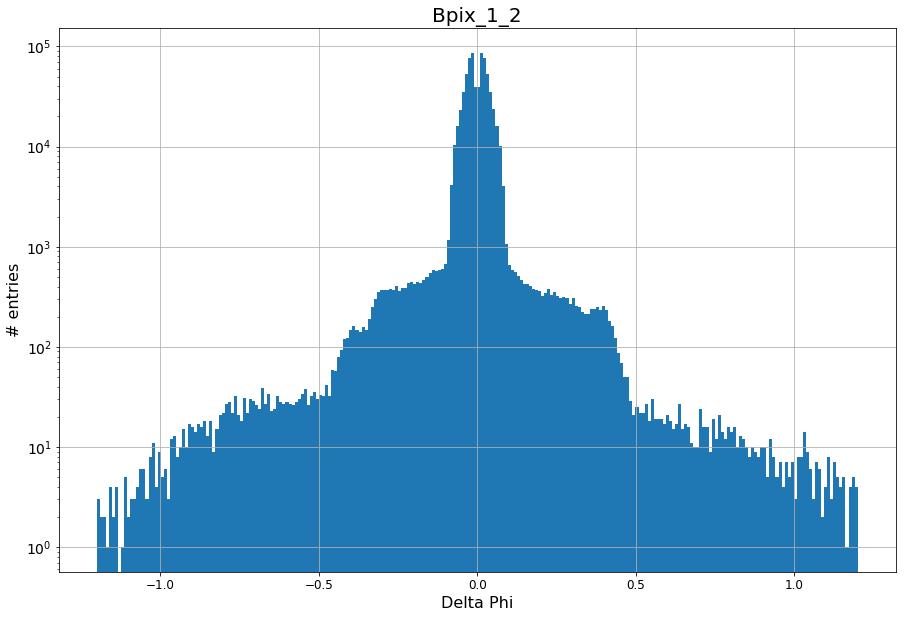

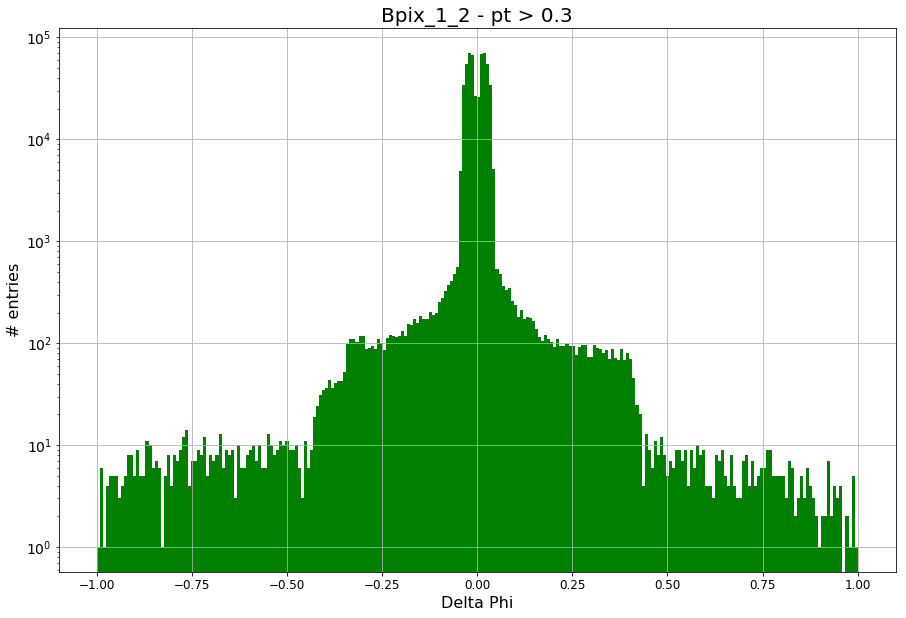

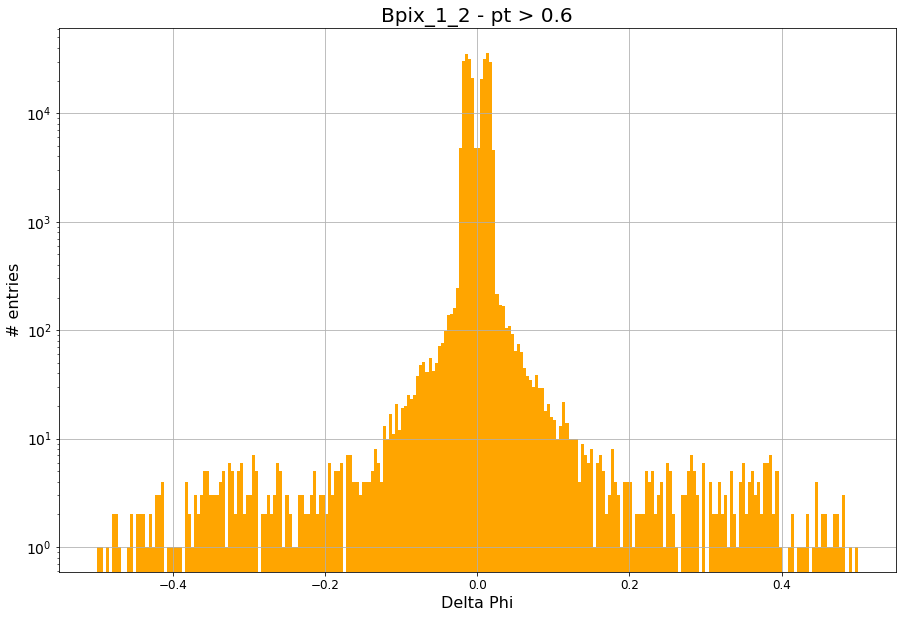

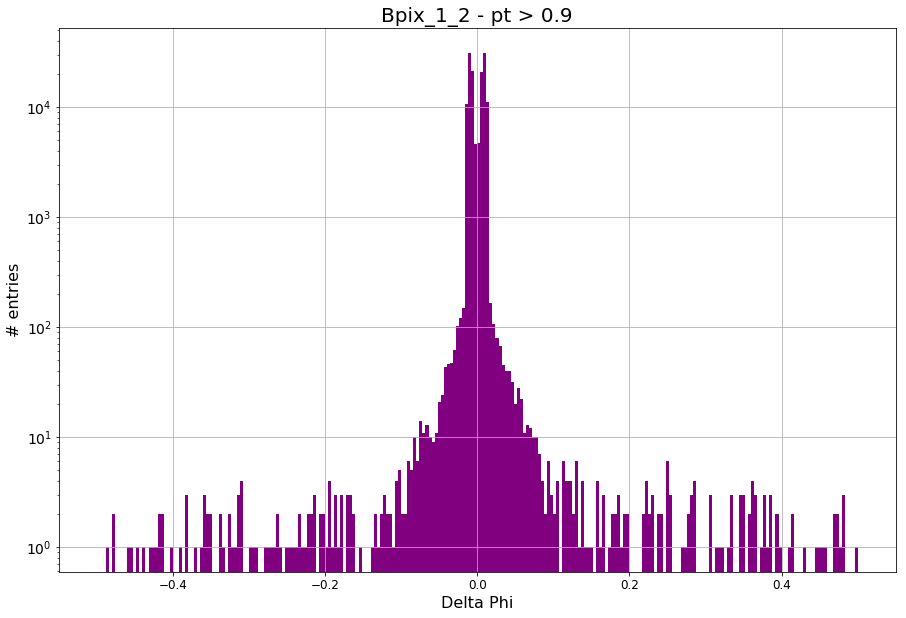

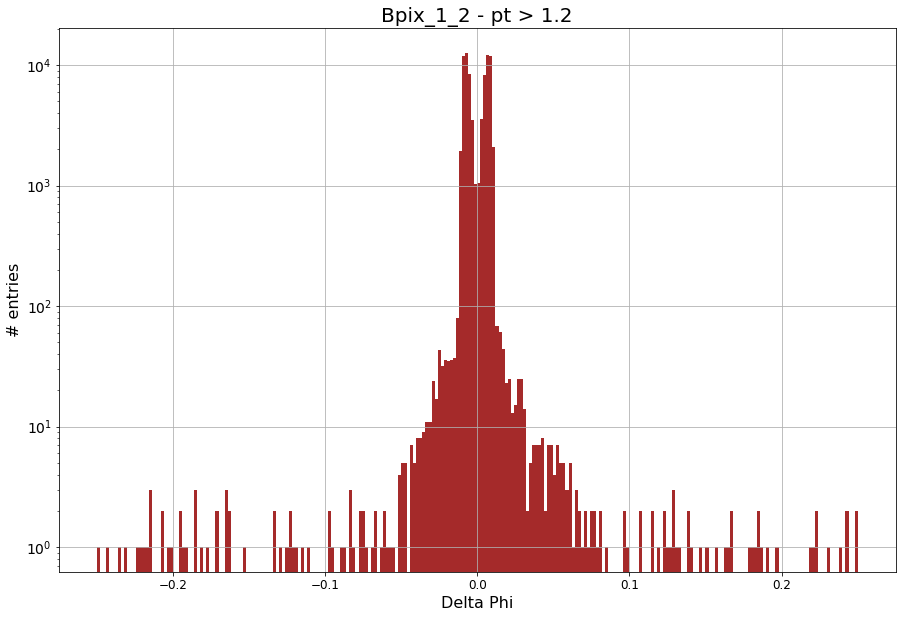

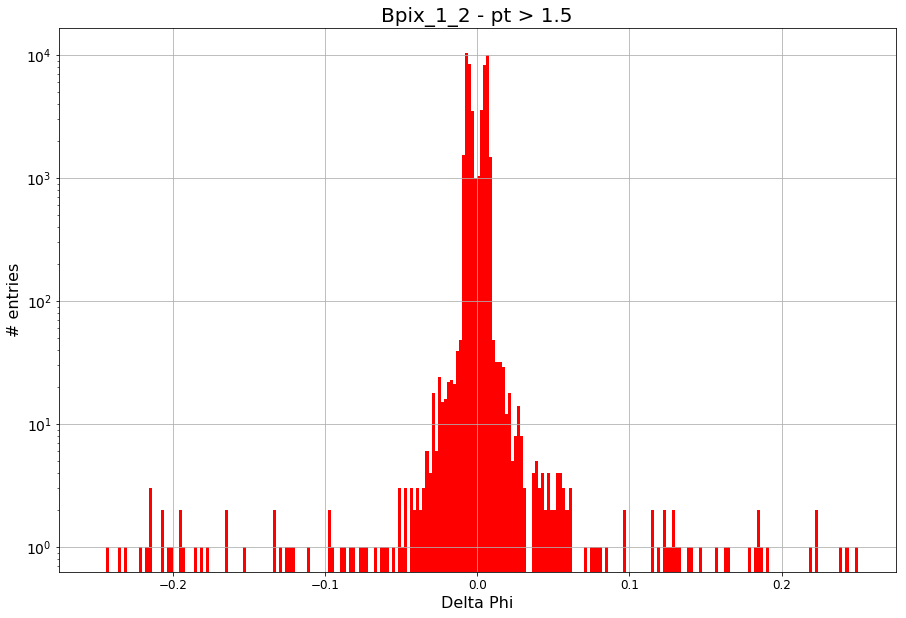

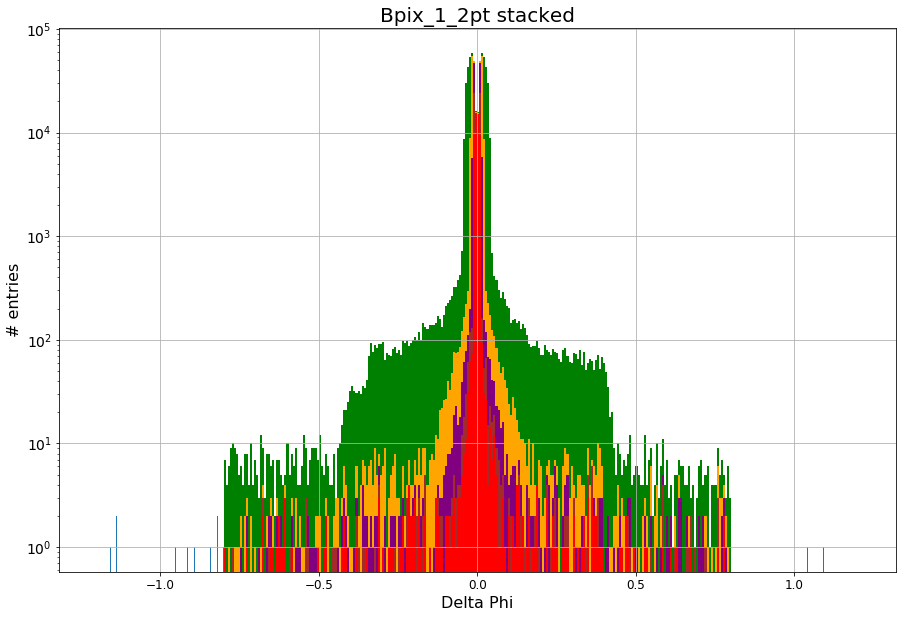

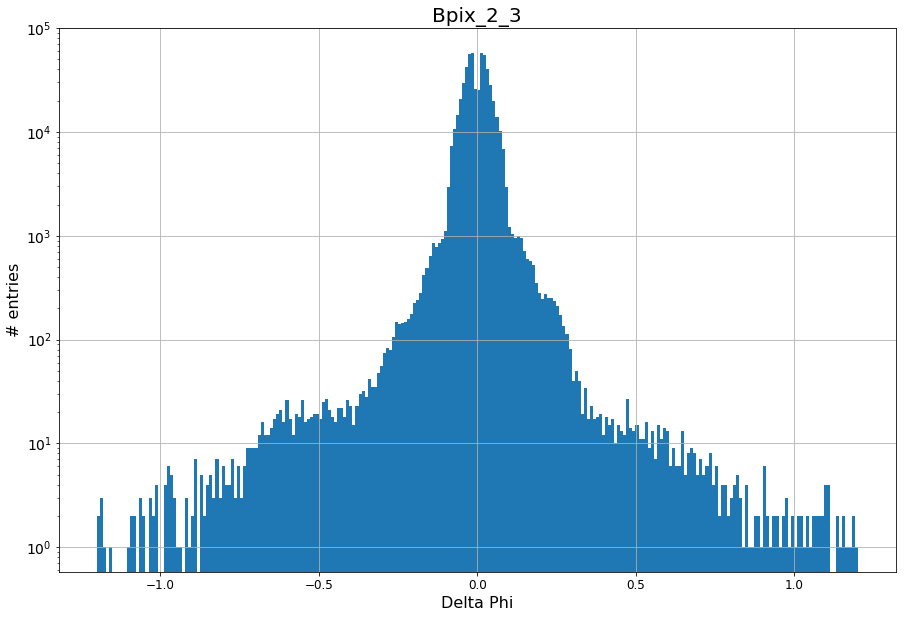

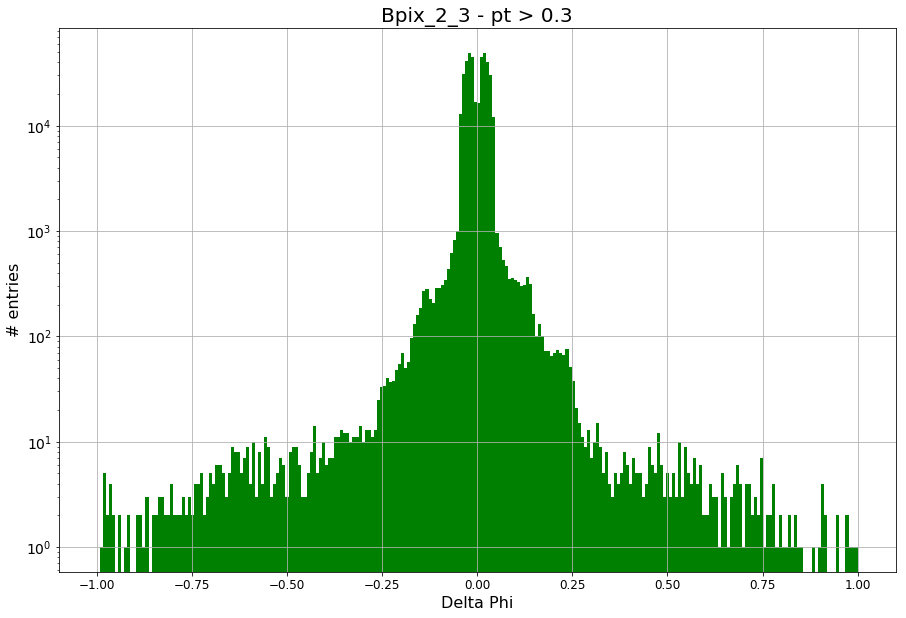

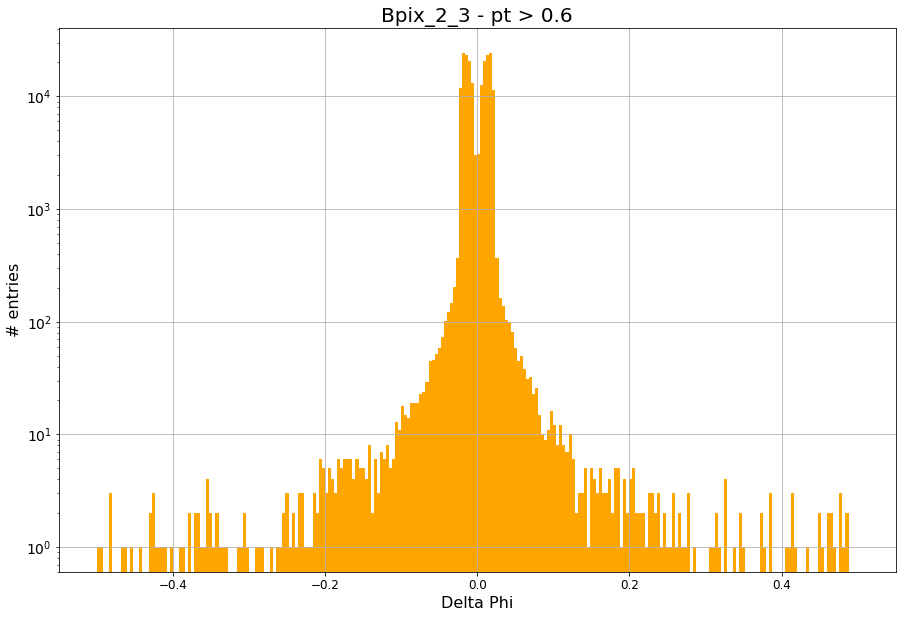

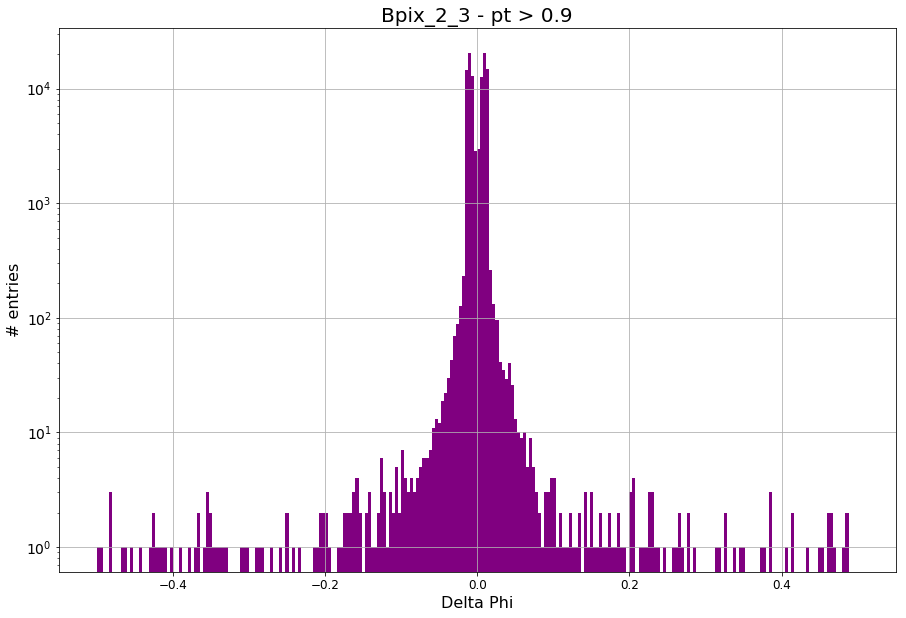

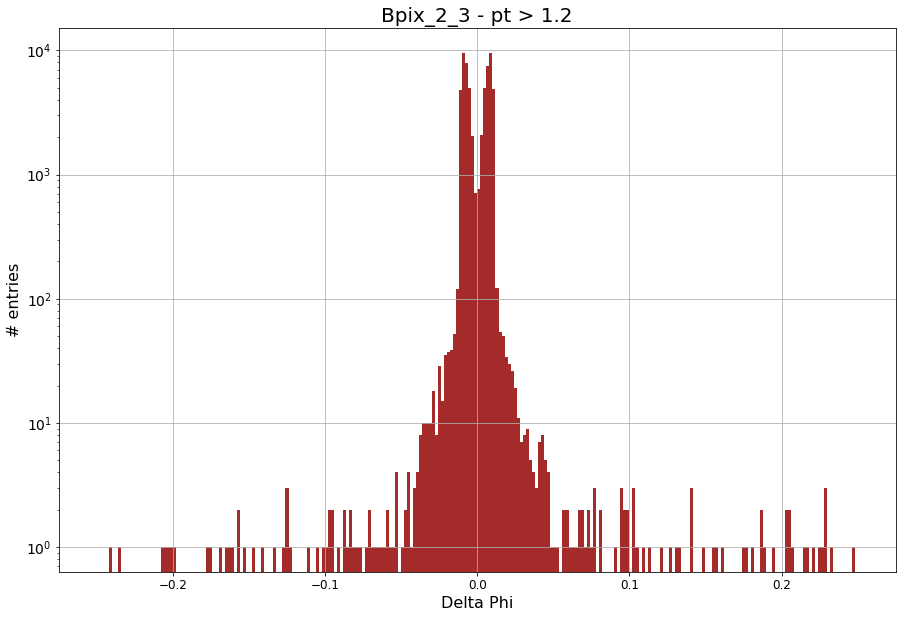

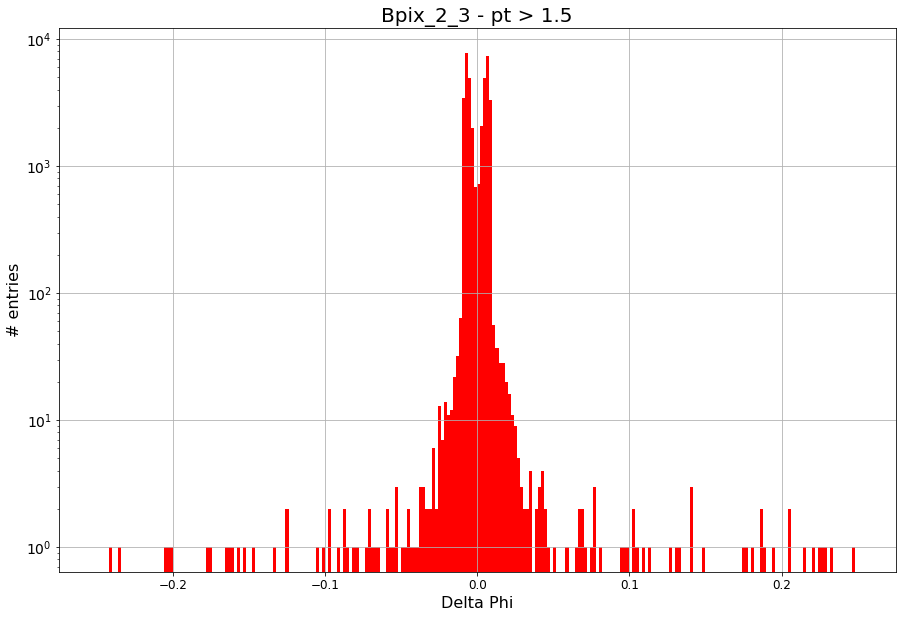

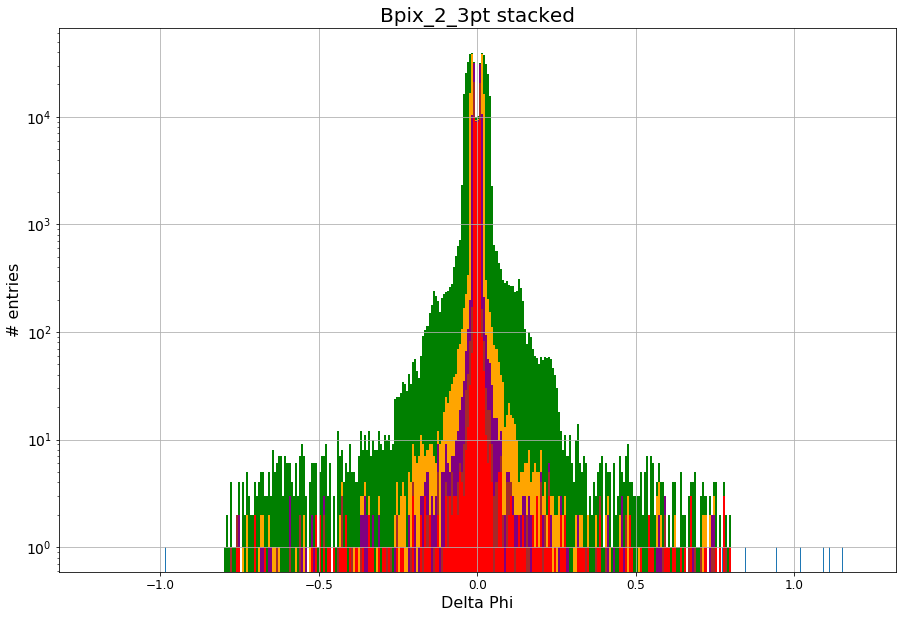

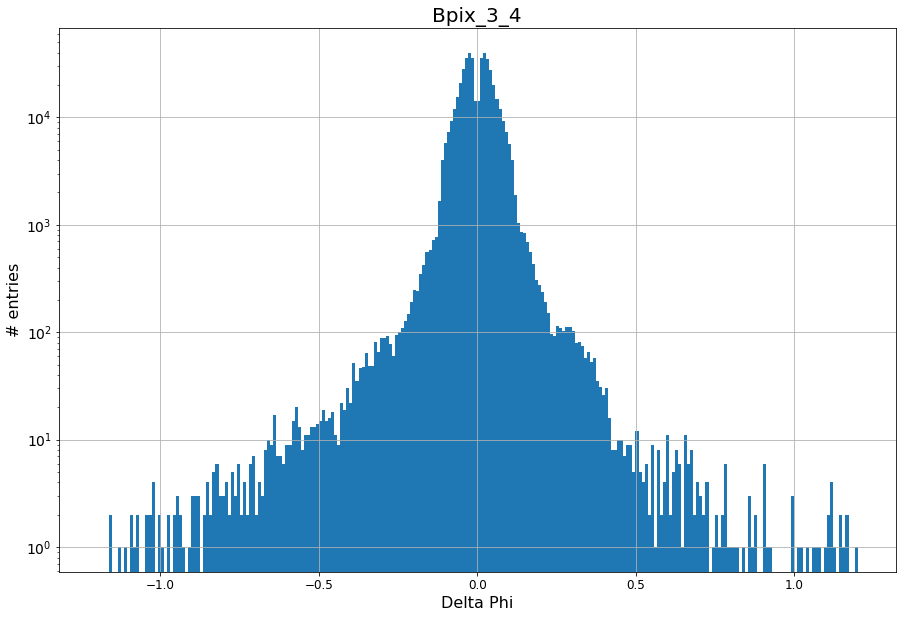

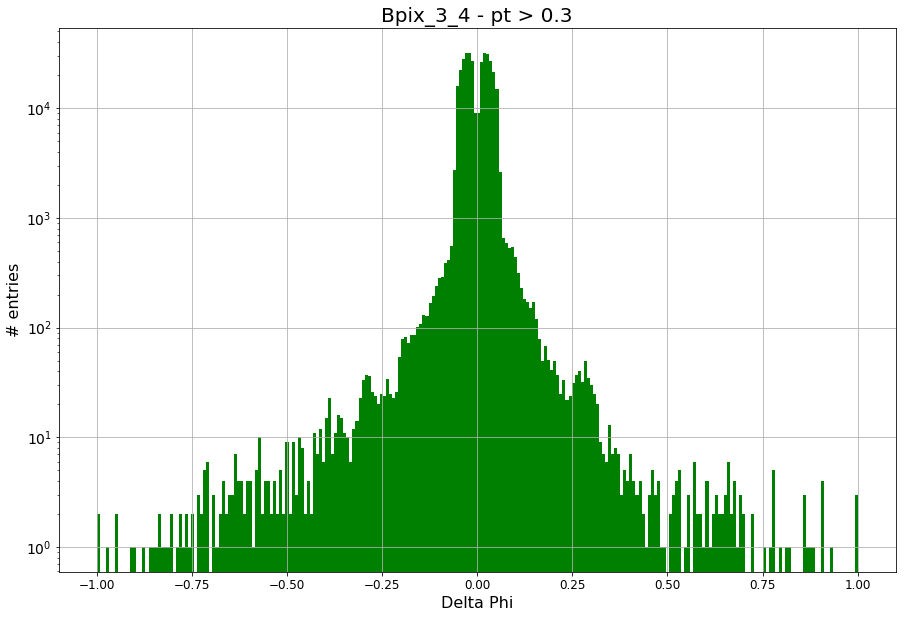

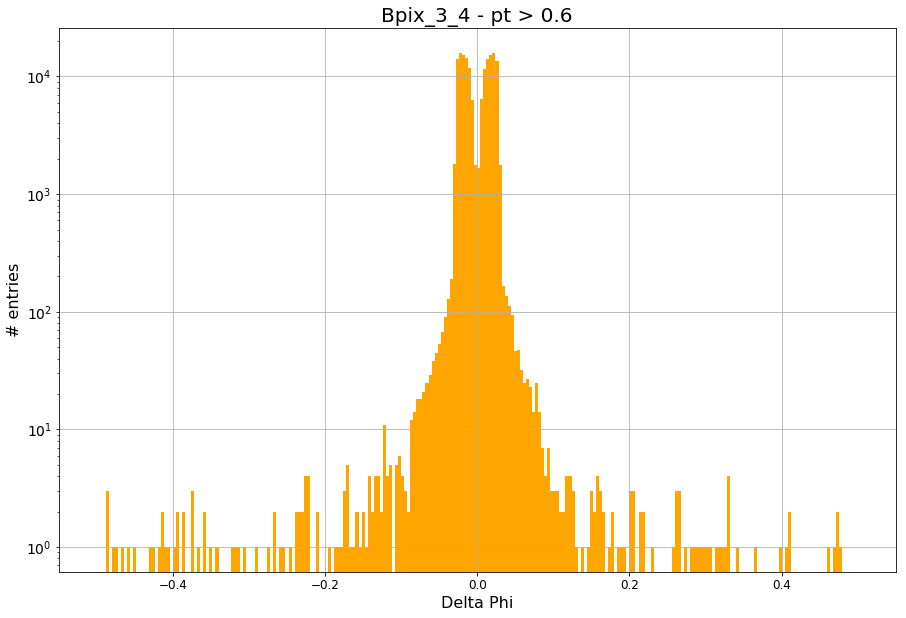

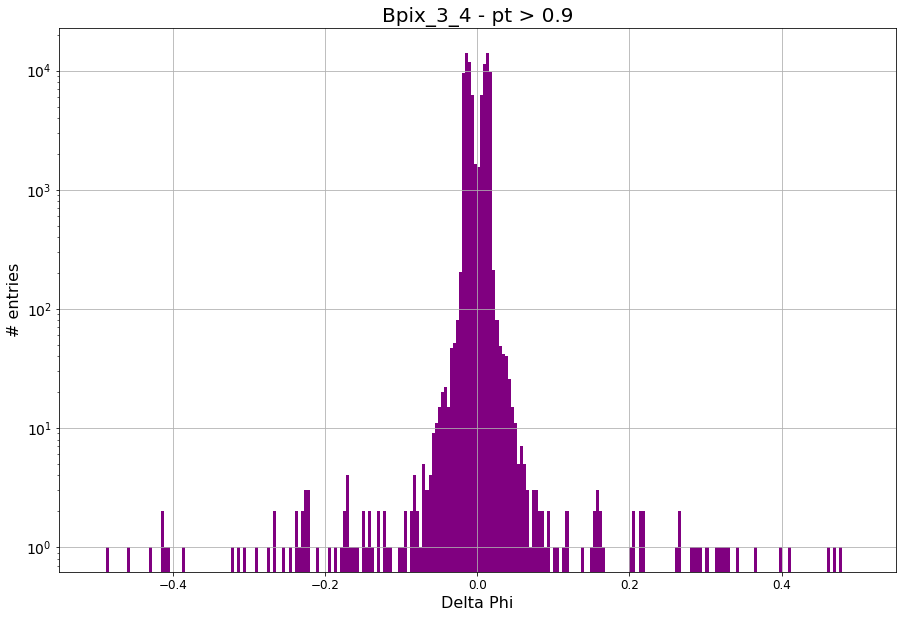

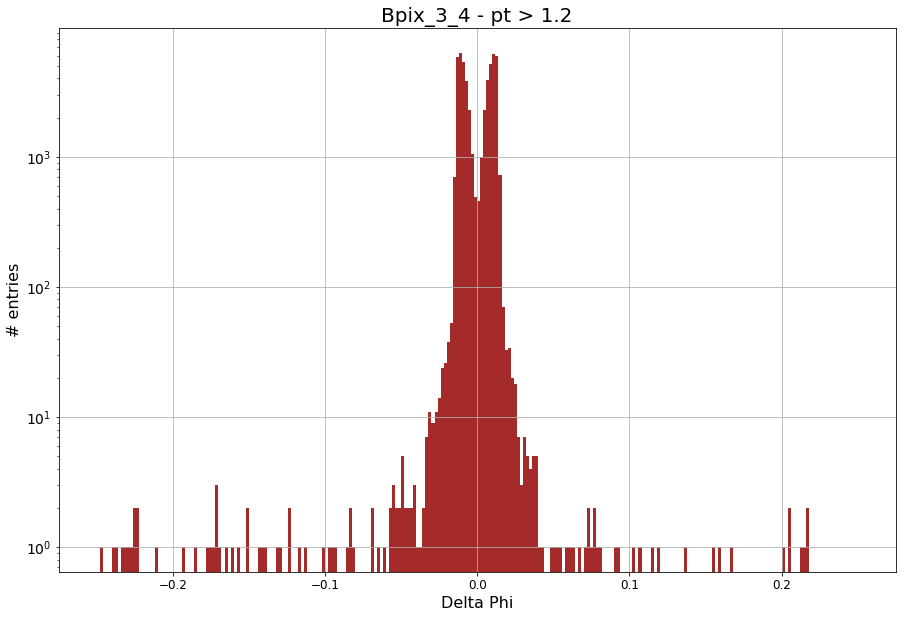

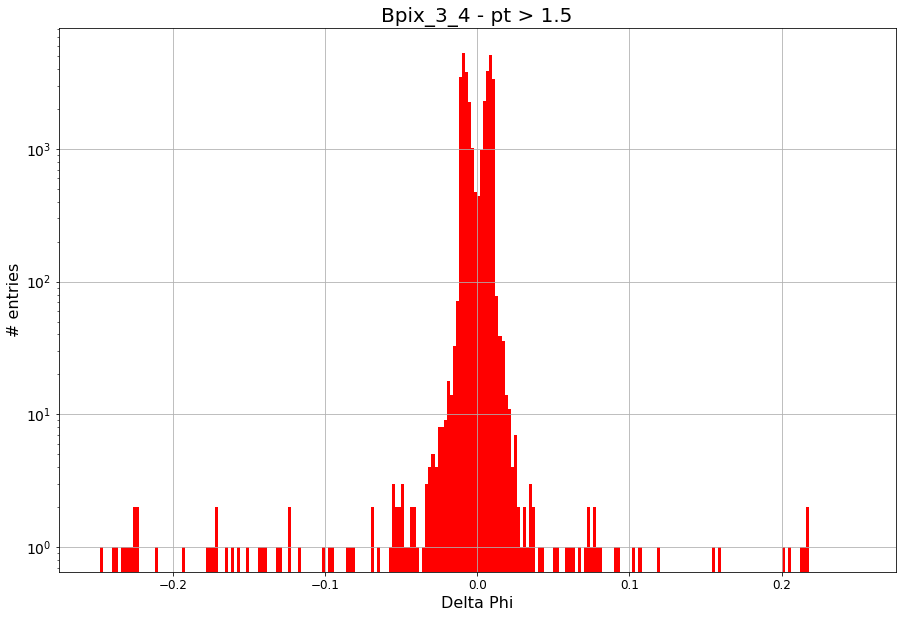

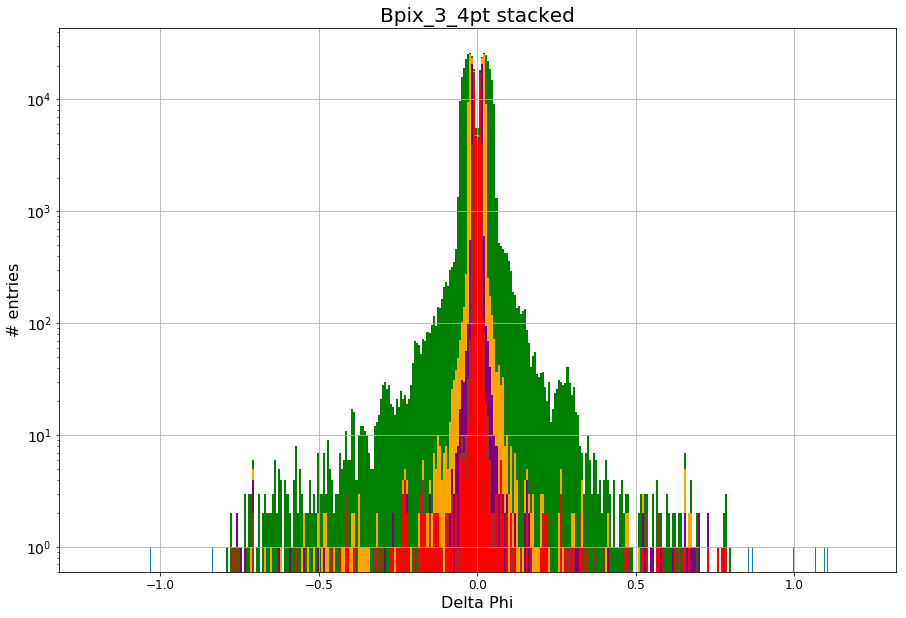

In [113]:
labels_true = ["Bpix_1_2","Bpix_2_3","Bpix_3_4"]
pt_colors = ["green","orange","purple","brown","red"]
pt_ranges = [[-1.0,1.0],[-0.5,0.5],[-0.5,0.5],[-0.25,0.25],[-0.25,0.25]]
for d,l,dpt in zip(delta_phis_true,labels_true,delta_phis_true_pt):
    plt.figure(figsize=(15,10))
    nphiDeltaF,bphiDeltaF,_ = plt.hist(d,bins=250,range=[-1.2,1.2],label=l,log=True)
    #for c,col in zip(cuts,colors):   
        #plt.plot([-c,-c],[0.0,3e5],color=col)
        #plt.plot([c,c],[0.0,3e5],color=col)
    plt.title(l,fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel("Delta Phi",fontsize=16)
    plt.ylabel("# entries",fontsize=16)
    plt.grid()
    plt.show()
    
    
    for p,c,d,r in zip(ptcuts,pt_colors,dpt,pt_ranges):  
        plt.figure(figsize=(15,10))
        nphiDeltaF,bphiDeltaF,_ = plt.hist(d,bins=250,range=r,label=l,log=True,color=c)
        #for c,col in zip(cuts,colors):   
            #plt.plot([-c,-c],[0.0,3e5],color=col)
            #plt.plot([c,c],[0.0,3e5],color=col)
        plt.title(l + " - pt > " + str(p),fontsize=20)
        plt.yticks(fontsize=14)
        plt.xticks(fontsize=12)
        plt.xlabel("Delta Phi",fontsize=16)
        plt.ylabel("# entries",fontsize=16)
        plt.grid()
        plt.show()
    
    plt.figure(figsize=(15,10))
    plt.hist(d,bins=1000,range=[-1.2,1.2],label=l,log=True)
    
    plt.title(l + "pt stacked",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel("Delta Phi",fontsize=16)
    plt.ylabel("# entries",fontsize=16)
    plt.grid()
    
    for p,c,d in zip(ptcuts,pt_colors,dpt):  
        nphiDeltaF,bphiDeltaF,_ = plt.hist(d,bins=250,range=[-0.8,0.8],label=l,log=True,color=c)
            
    plt.show()

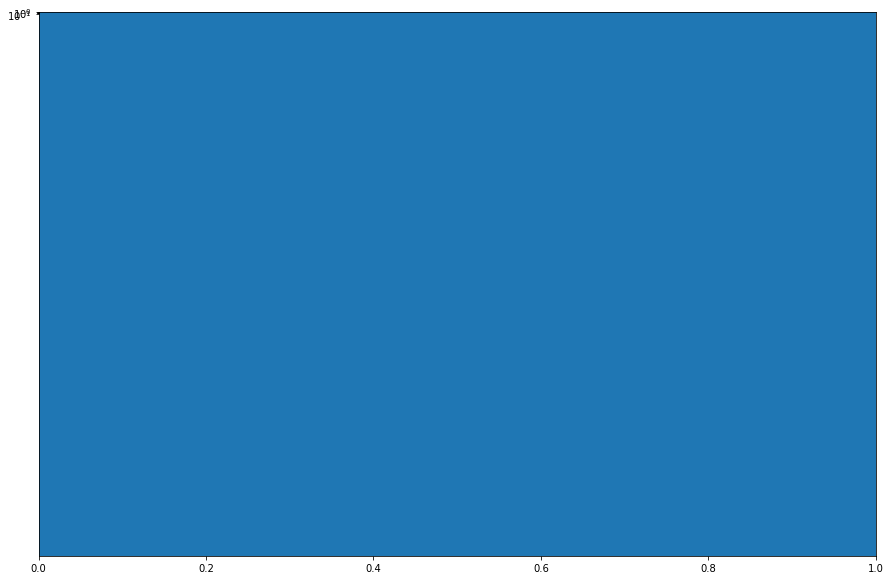

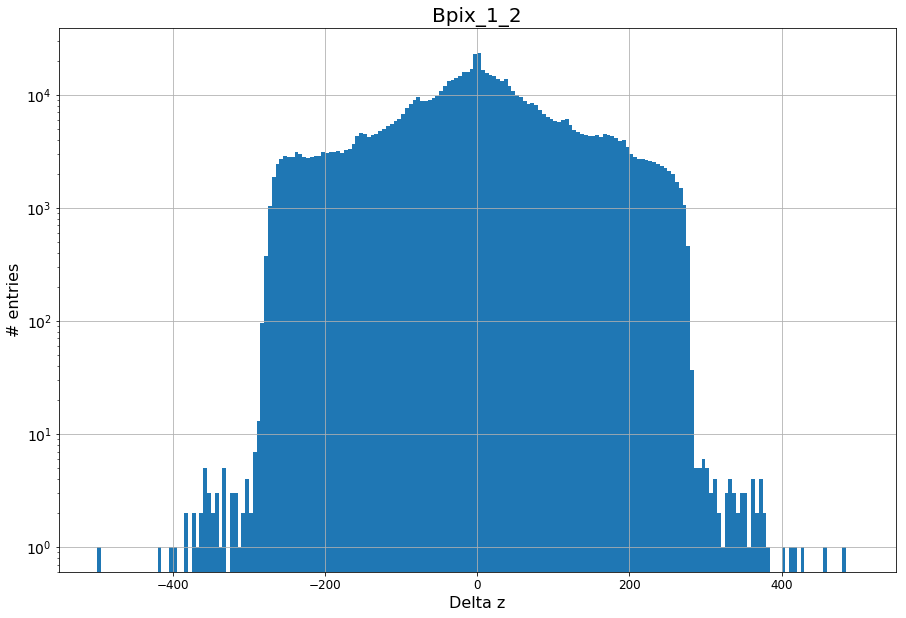

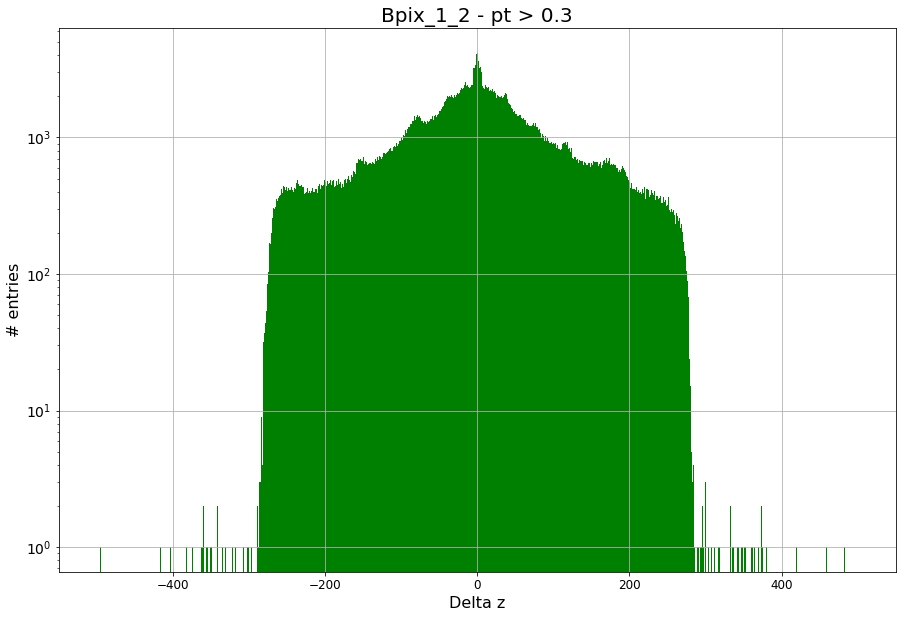

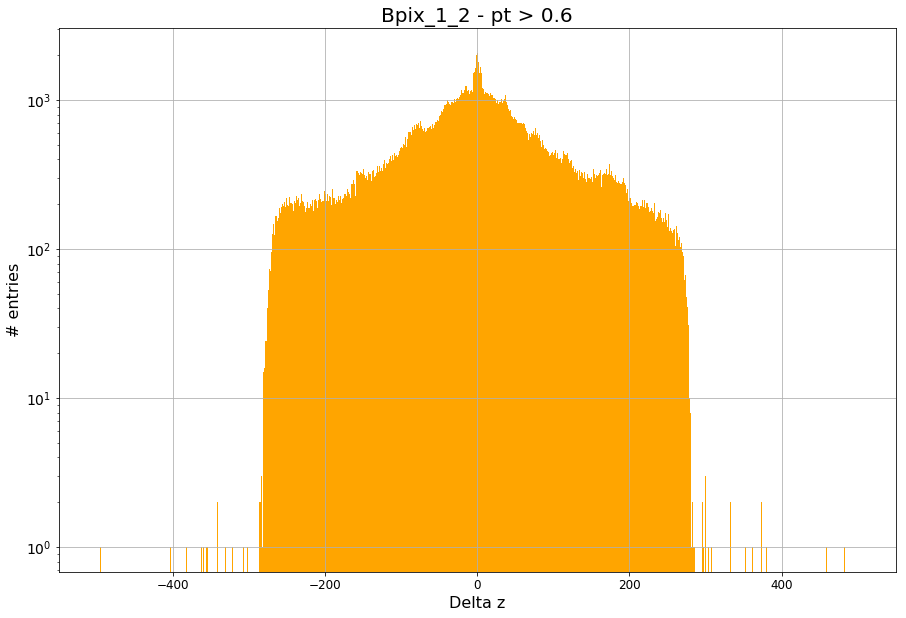

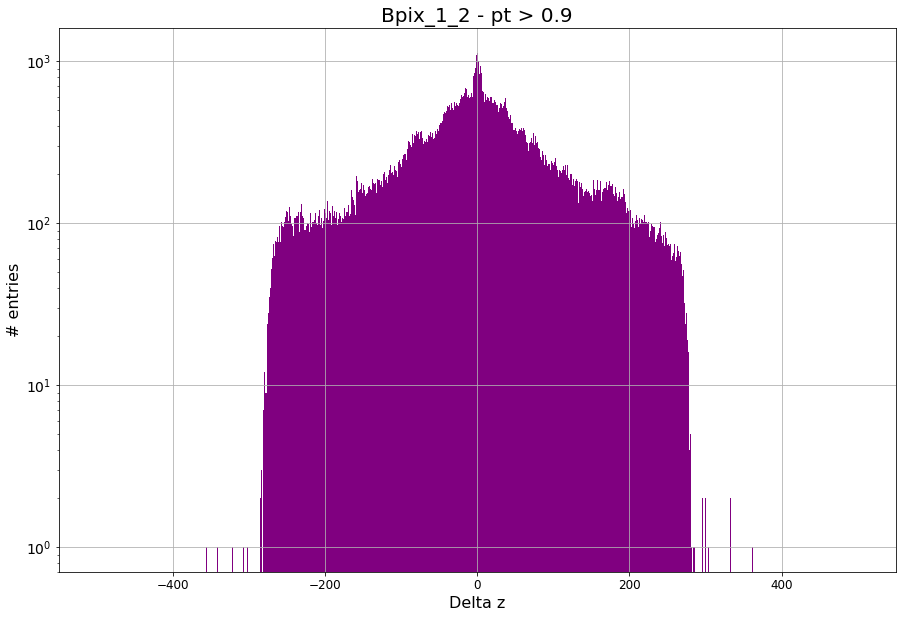

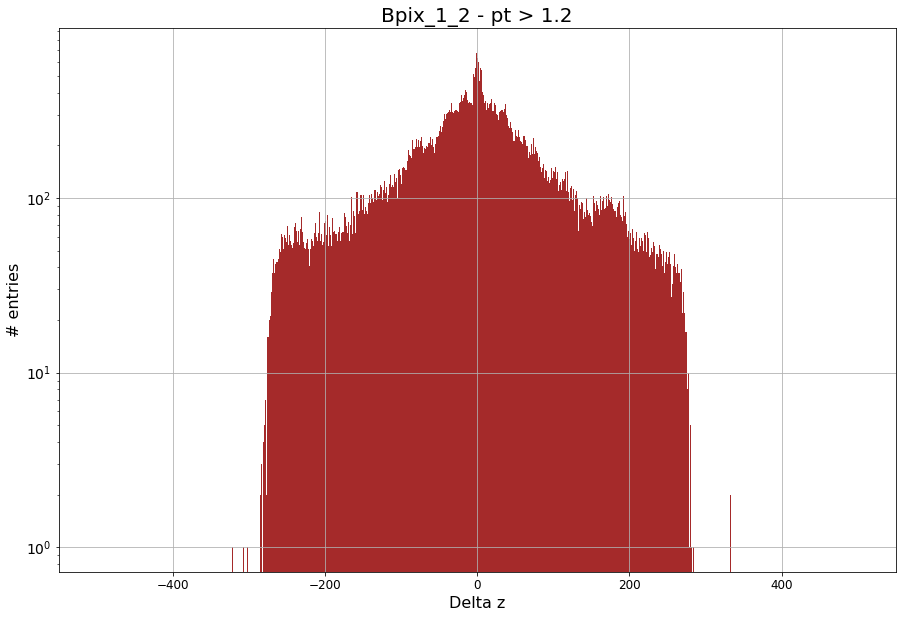

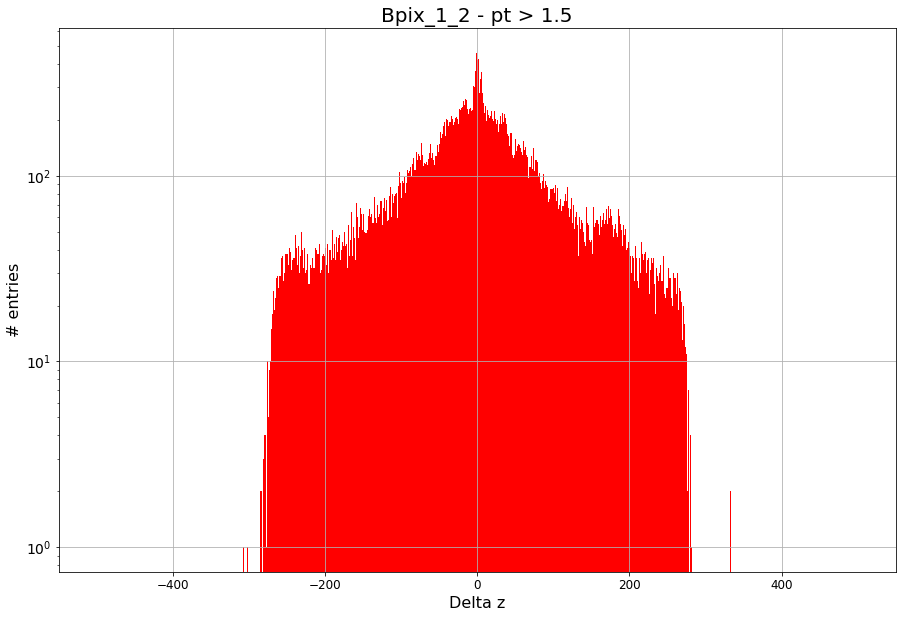

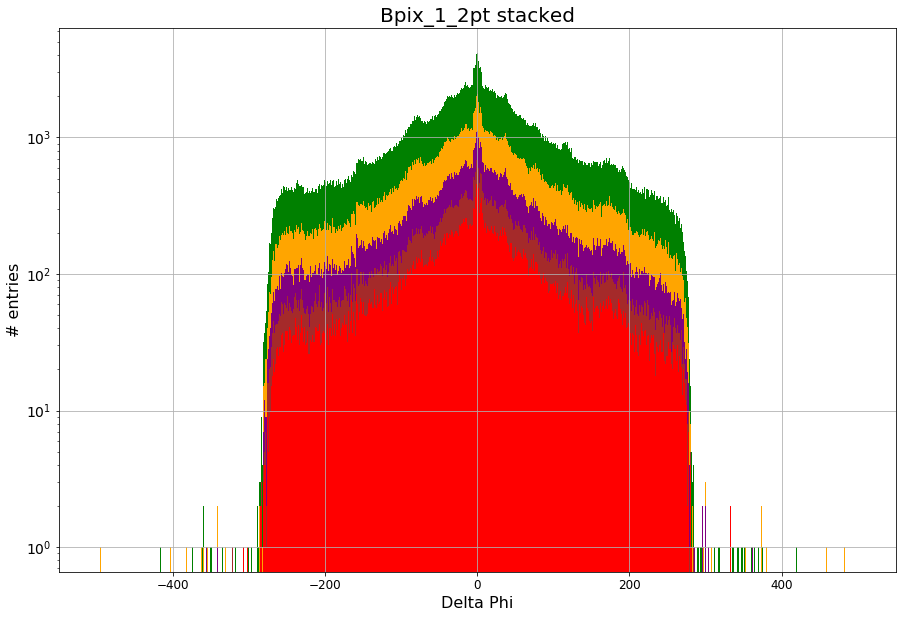

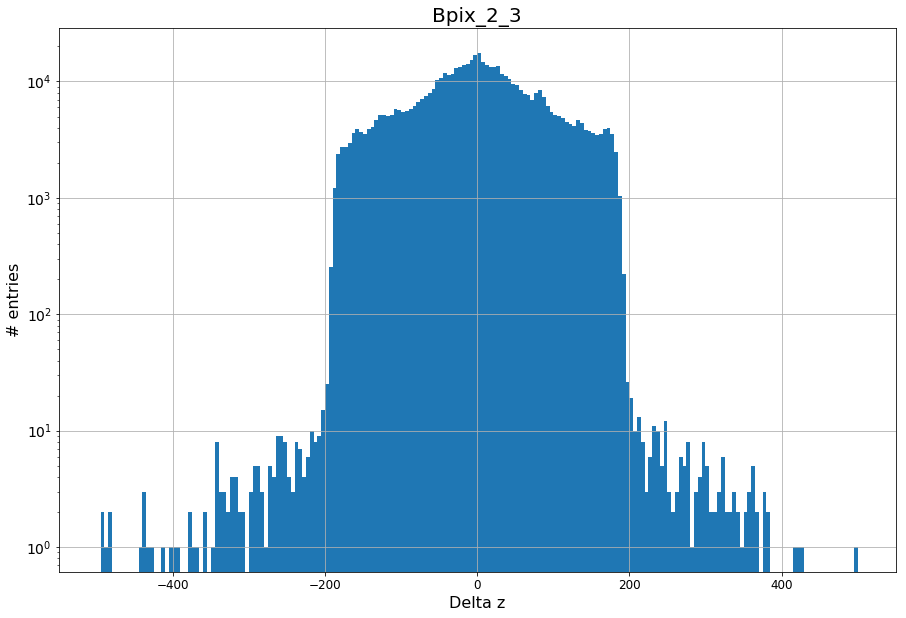

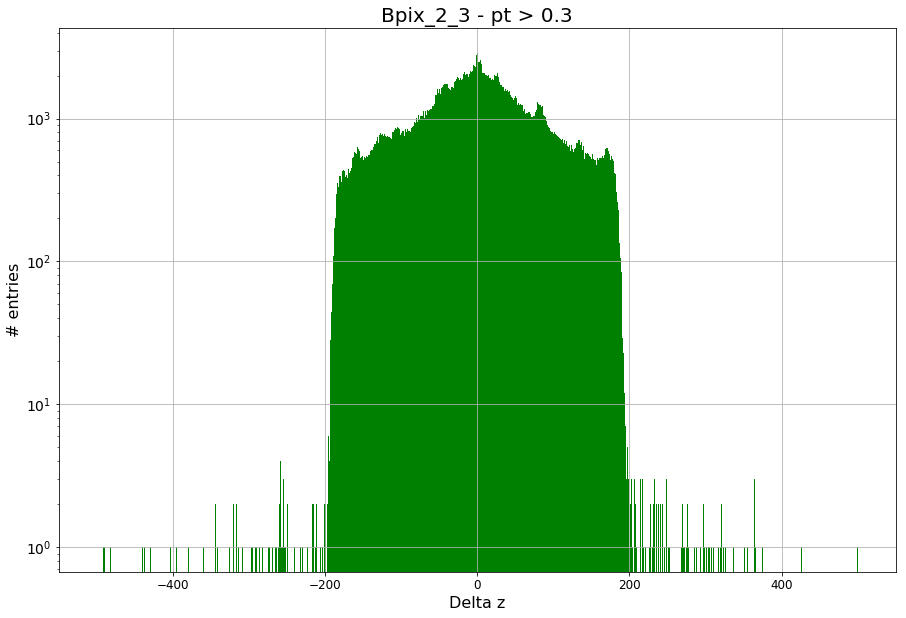

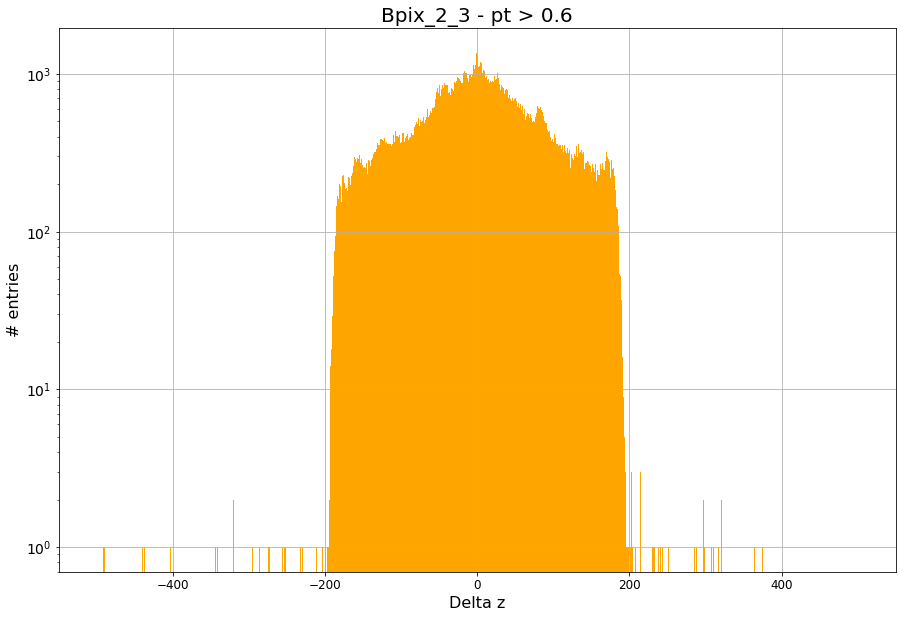

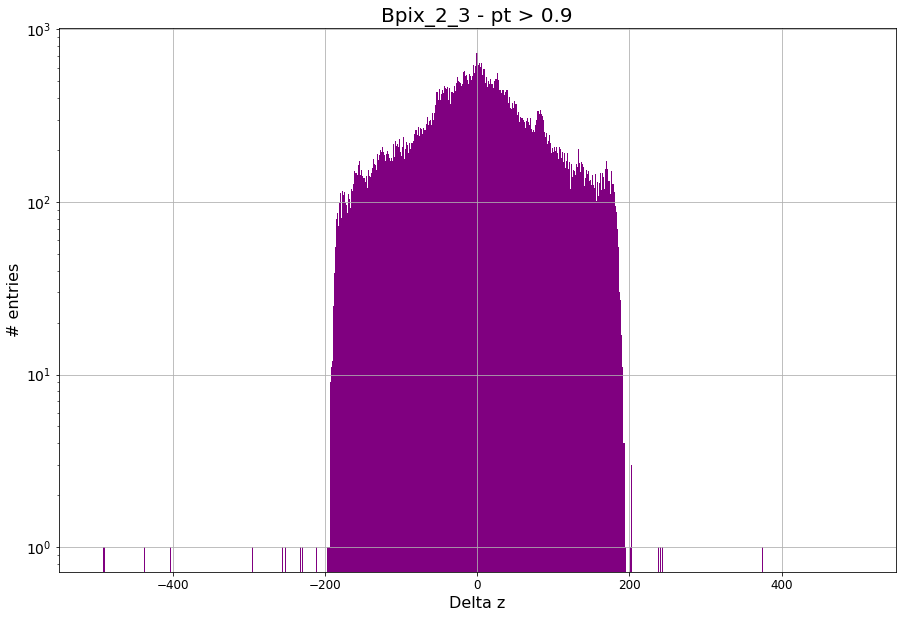

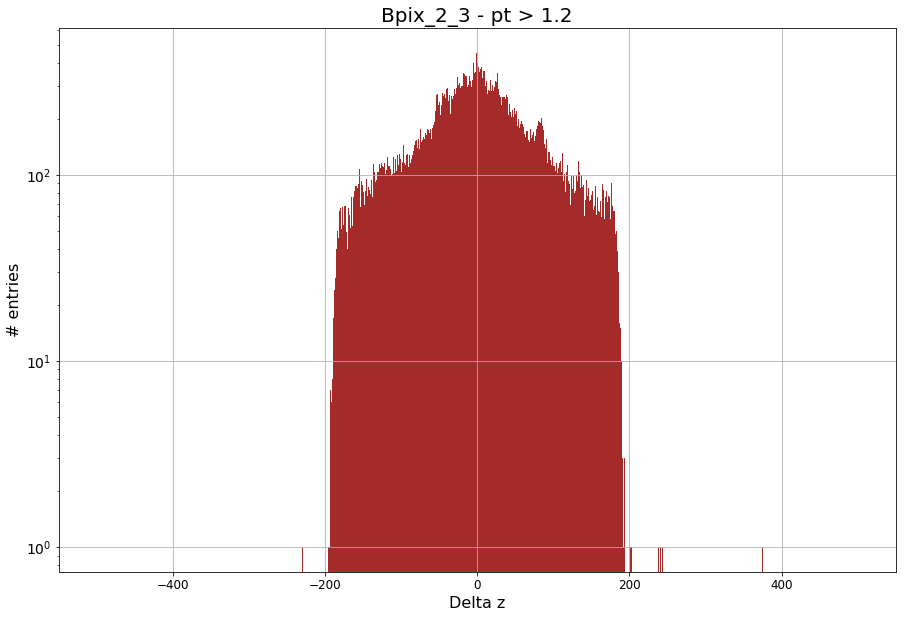

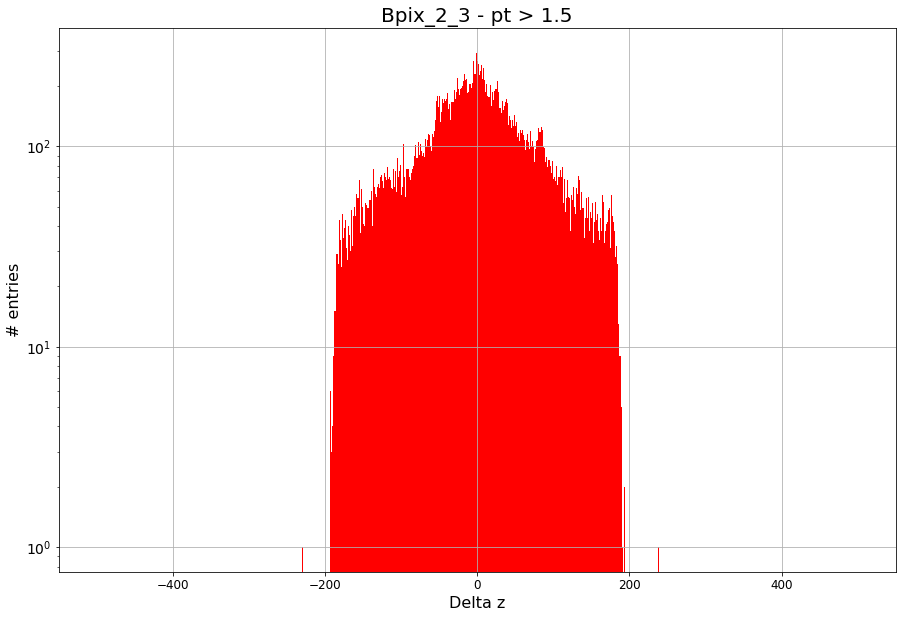

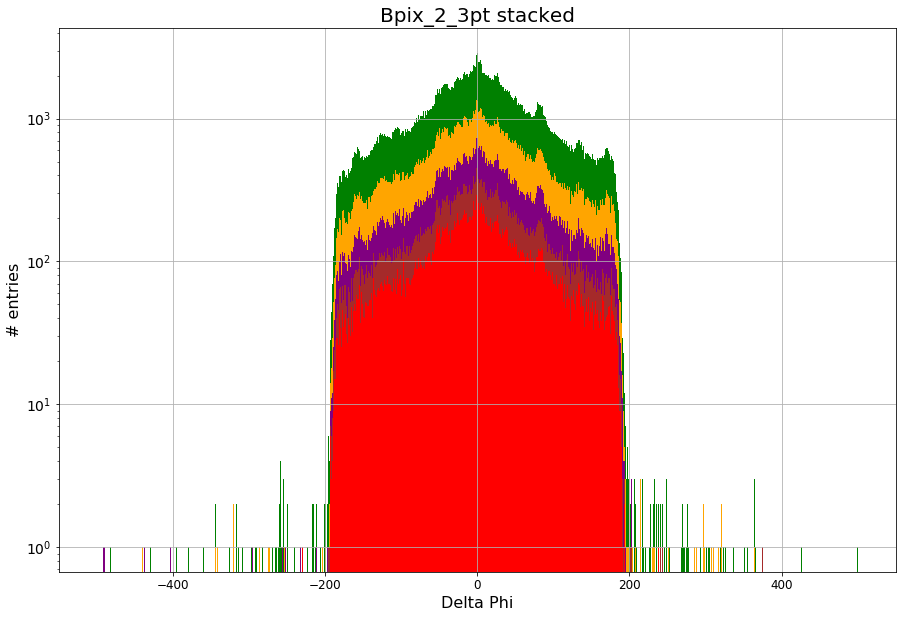

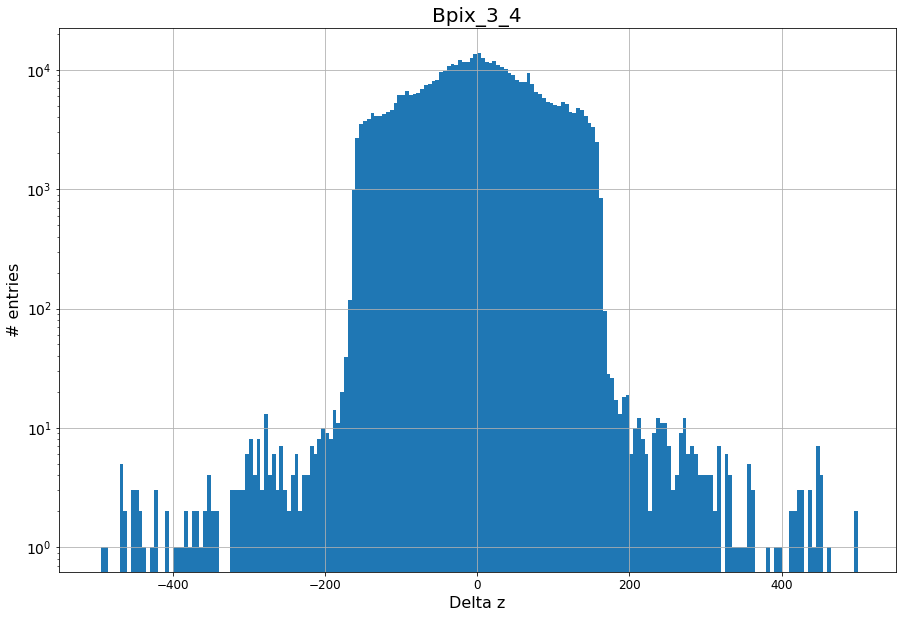

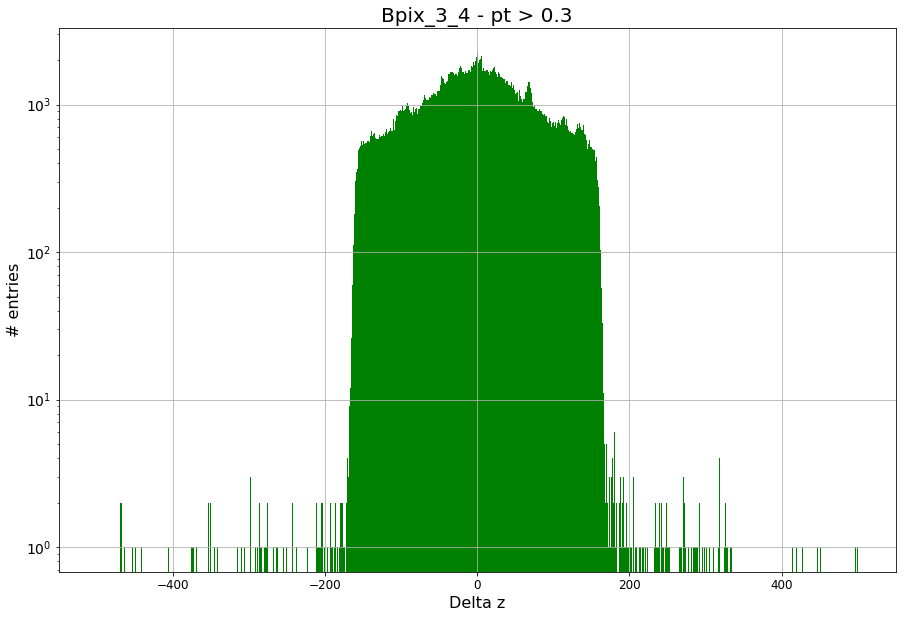

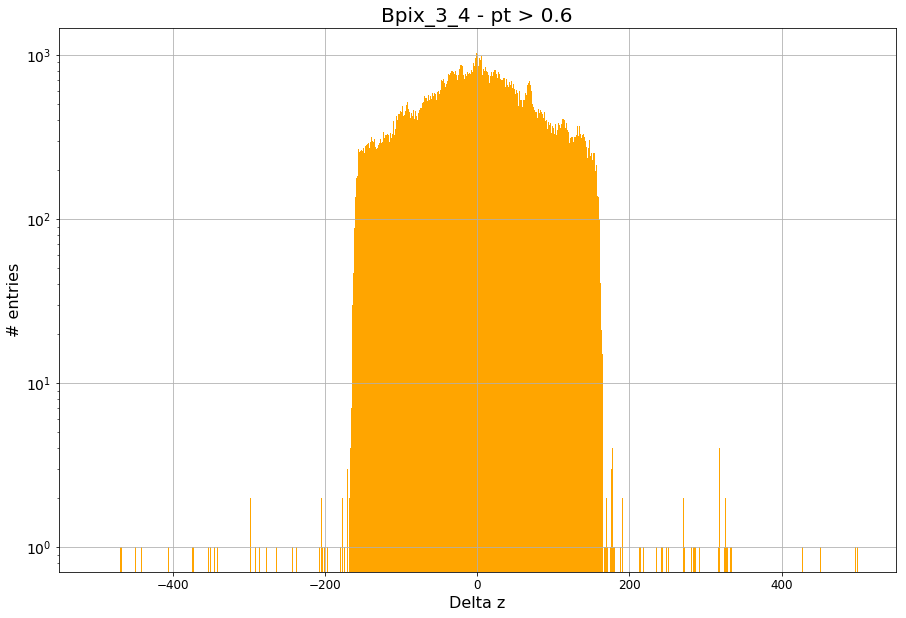

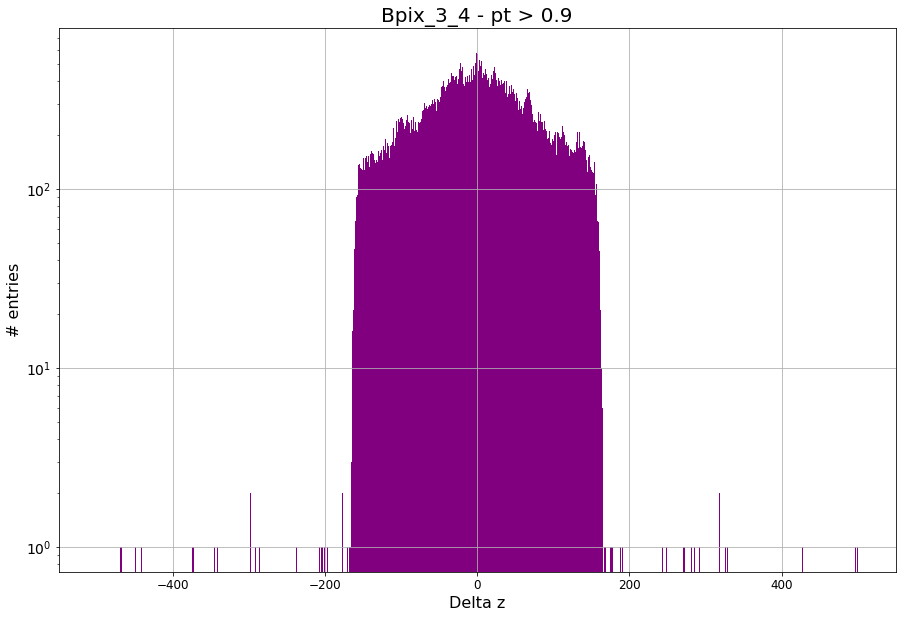

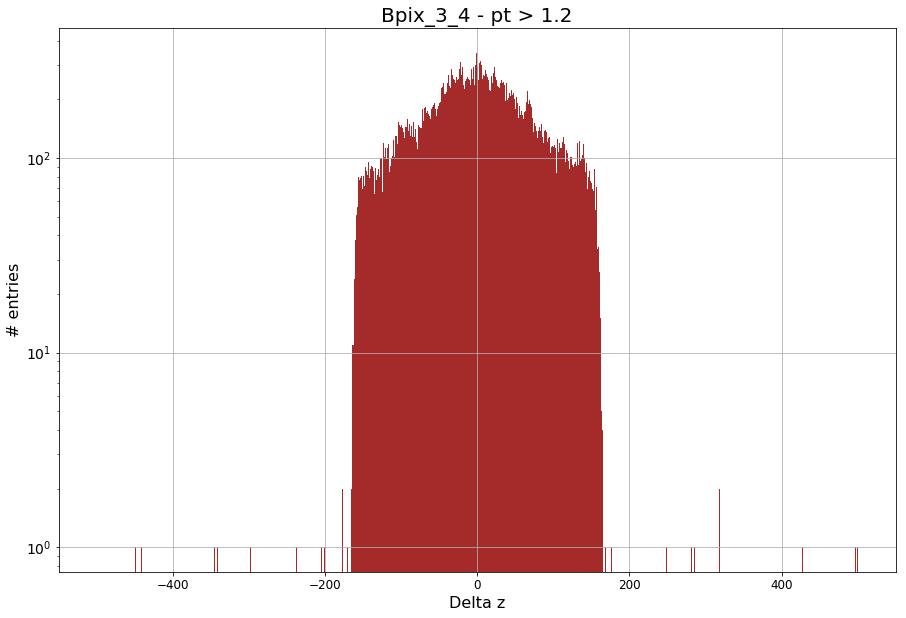

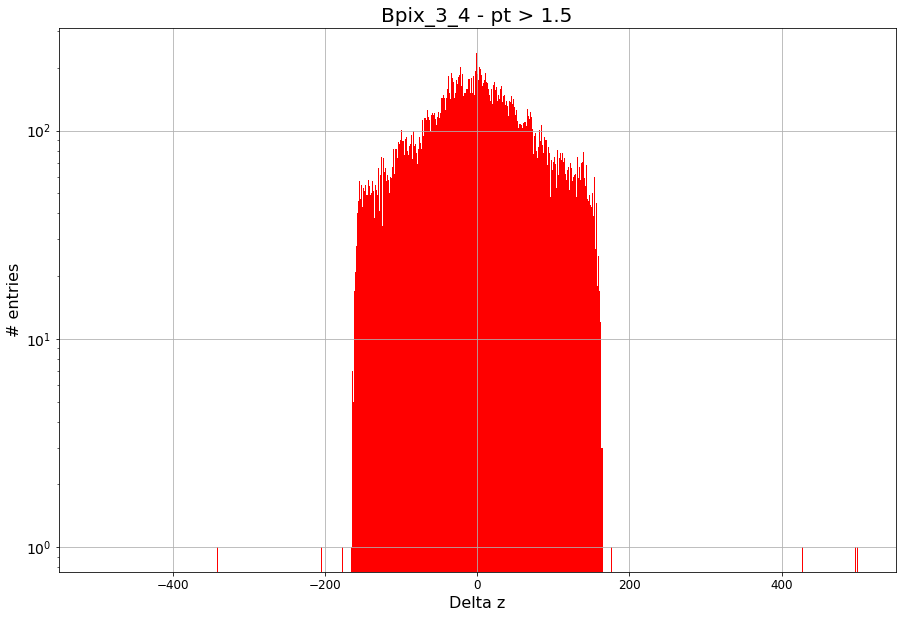

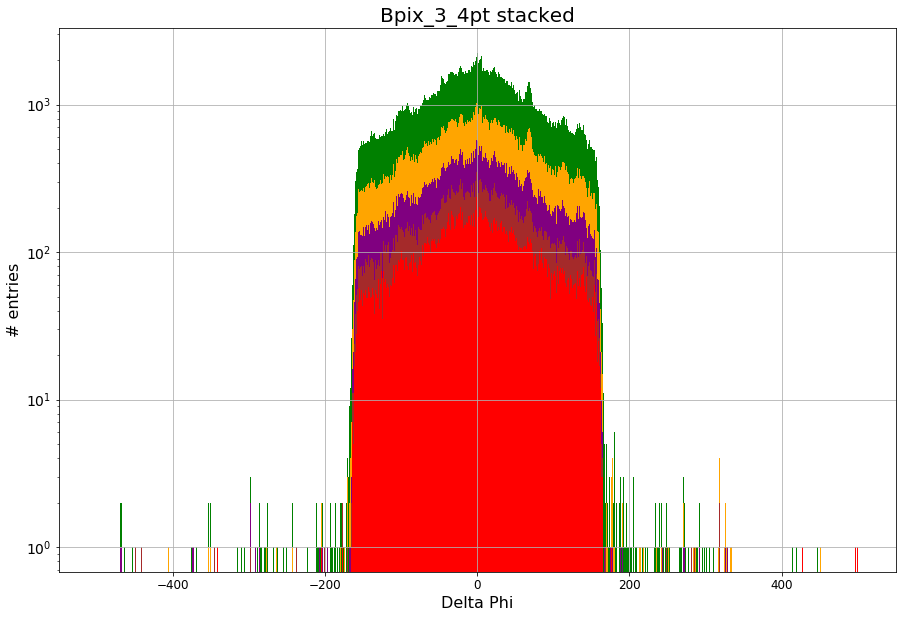

In [118]:
zcuts = [280.0,190.0,170.0]
cuts = [1.0,0.75,0.5,0.25,0.1]
zcuts = [280.0,190.0,170.0]
zcolors = ["r","orange","green"]
colors = ["r","orange","y","cyan","green"]
labels_true = ["Bpix_1_2","Bpix_2_3","Bpix_3_4"]
for d,l,dpt in zip(delta_zs_true,labels_true,delta_zs_true_pt):
    plt.figure(figsize=(15,10))
    nphiDeltaF,bphiDeltaF,_ = plt.hist(d,range=[-500.,+500.],bins=200,label=l,log=True)
    #for c,col in zip(zcuts,zcolors):   
    #    plt.plot([-c,-c],[0.0,1e5],color=col)
    #    plt.plot([c,c],[0.0,1e5],color=col)
    plt.title(l,fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel("Delta z",fontsize=16)
    plt.ylabel("# entries",fontsize=16)
    plt.grid()
    plt.show()
    
    for p,c,d in zip(ptcuts,pt_colors,dpt):  
        plt.figure(figsize=(15,10))
        nphiDeltaF,bphiDeltaF,_ = plt.hist(d,bins=1000,range=[-500.,+500.],label=l,log=True,color=c)
        #for c,col in zip(cuts,colors):   
            #plt.plot([-c,-c],[0.0,3e5],color=col)
            #plt.plot([c,c],[0.0,3e5],color=col)
        plt.title(l + " - pt > " + str(p),fontsize=20)
        plt.yticks(fontsize=14)
        plt.xticks(fontsize=12)
        plt.xlabel("Delta z",fontsize=16)
        plt.ylabel("# entries",fontsize=16)
        plt.grid()
        plt.show()

    plt.figure(figsize=(15,10))
    plt.hist(d,bins=1000,range=[-500.,+500.],label=l,log=True)
    
    plt.title(l + "pt stacked",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel("Delta Phi",fontsize=16)
    plt.ylabel("# entries",fontsize=16)
    plt.grid()
    
    for p,c,d in zip(ptcuts,pt_colors,dpt):  
        nphiDeltaF,bphiDeltaF,_ = plt.hist(d,bins=1000,range=[-500.,+500.],label=l,log=True,color=c)
            
    plt.show()

In [197]:
labels_true = ["Bpix_1_2","Bpix_2_3","Bpix_3_4"]
cuts = numpy.linspace(1.00,0.0,21)#[1.0,0.75,0.5,0.25,0.1]
results = []

tables_phi = []

for d,dt,l,dpt in zip(delta_phis,delta_phis_true,labels_true,delta_phis_true_pt):
    
        
    print("\n==== " + l + "\n")
    print("Tot combinatorial doublets (1 evt)  = " + str(d.shape[0]))
    print("Tot true doublets          (90 evt) = " + str(dt.shape[0]) + "\n")
    for c in cuts:
        
        dd  = d[abs(d)<c]
        ddt = dt[abs(dt)<c]
        
        result = [c,(1.0-(float(dd.shape[0])/float(d.shape[0])))*100.,float(ddt.shape[0])/float(dt.shape[0])*100.]
        
        for d_pt in dpt:
            ddpt = d_pt[abs(d_pt)<c]
            result.append(float(ddpt.shape[0])/float(d_pt.shape[0])*100.)
        
        results.append(result)
        
        #print("Phi cut @ %.2f" % (c))
        #print(" - Fake rejected: %.2f %%"% ( result[0] ))
        #print(" - True retained: %.2f %%"% ( result[1] ))

    results = numpy.array(results)
    table_cols = ["Cut","Bkg Rej","Eff. ","Pt > 0.3","Pt > 0.6","Pt > 0.9","Pt > 1.2","Pt > 1.5"]
    
    table = pandas.DataFrame(results,columns=table_cols)
    print(table.round(2).head(n=-1))
    
    tables_phi.append(table)

    results = []
    


==== Bpix_1_2

Tot combinatorial doublets (1 evt)  = 47590020
Tot true doublets          (90 evt) = 719736

     Cut  Bkg Rej  Eff.   Pt > 0.3  Pt > 0.6  Pt > 0.9  Pt > 1.2  Pt > 1.5
0   1.00    68.15  99.62     99.73     99.83     99.83     99.87     99.90
1   0.95    69.77  99.61     99.72     99.82     99.83     99.86     99.90
2   0.90    71.35  99.60     99.71     99.82     99.82     99.86     99.90
3   0.85    72.90  99.58     99.70     99.81     99.82     99.85     99.90
4   0.80    74.52  99.56     99.69     99.80     99.81     99.84     99.89
5   0.75    76.15  99.53     99.67     99.79     99.80     99.83     99.88
6   0.70    77.73  99.50     99.66     99.79     99.80     99.83     99.88
7   0.65    79.28  99.47     99.64     99.78     99.78     99.82     99.87
8   0.60    80.89  99.43     99.63     99.77     99.77     99.80     99.85
9   0.55    82.51  99.40     99.61     99.76     99.76     99.80     99.84
10  0.50    84.08  99.36     99.59     99.75     99.75     99.79  

In [196]:
labels_true = ["Bpix_1_2","Bpix_2_3","Bpix_3_4"]
cuts = numpy.linspace(280.0,80.0,11)#[1.0,0.75,0.5,0.25,0.1]
results = []

for d,dt,l,dpt in zip(delta_zs,delta_zs_true,labels_true,delta_zs_true_pt):
    
        
    print("\n==== " + l + "\n")
    print("Tot combinatorial doublets (1 evt)  = " + str(d.shape[0]))
    print("Tot true doublets          (90 evt) = " + str(dt.shape[0]) + "\n")
    for c in cuts:
        
        dd  = d[abs(d)<c]
        ddt = dt[abs(dt)<c]
        
        result = [c,(1.0-(float(dd.shape[0])/float(d.shape[0])))*100.,float(ddt.shape[0])/float(dt.shape[0])*100.]
        
        for d_pt in dpt:
            ddpt = d_pt[abs(d_pt)<c]
            result.append(float(ddpt.shape[0])/float(d_pt.shape[0])*100.)
        
        results.append(result)
        
        #print("Phi cut @ %.2f" % (c))
        #print(" - Fake rejected: %.2f %%"% ( result[0] ))
        #print(" - True retained: %.2f %%"% ( result[1] ))

    results = numpy.array(results)
    table_cols = ["Cut","Bkg Rej","Eff.","Pt > 0.3","Pt > 0.6","Pt > 0.9","Pt > 1.2","Pt > 1.5"]
    
    table = pandas.DataFrame(results,columns=table_cols)
    print(table.round(2).head(n=-1))
    
    results = []
    


==== Bpix_1_2

Tot combinatorial doublets (1 evt)  = 47590020
Tot true doublets          (90 evt) = 719736

     Cut  Bkg Rej   Eff.  Pt > 0.3  Pt > 0.6  Pt > 0.9  Pt > 1.2  Pt > 1.5
0  280.0    27.68  99.96     99.97     99.97     99.97     99.97     99.96
1  260.0    31.13  98.50     98.52     98.56     98.62     98.66     98.71
2  240.0    34.79  95.74     95.77     95.86     95.99     96.11     96.22
3  220.0    38.69  92.69     92.71     92.86     93.08     93.30     93.44
4  200.0    42.87  89.51     89.57     89.73     90.02     90.37     90.59
5  180.0    47.29  85.61     85.68     85.94     86.30     86.75     86.98
6  160.0    51.95  81.32     81.40     81.66     82.16     82.70     82.93
7  140.0    56.90  76.43     76.53     76.87     77.49     78.29     78.66
8  120.0    62.19  71.14     71.24     71.62     72.30     73.20     73.77
9  100.0    67.76  64.70     64.80     65.20     65.98     66.88     67.61

==== Bpix_2_3

Tot combinatorial doublets (1 evt)  = 36113610
Tot

In [222]:
labels_true = ["Bpix_1_2","Bpix_2_3","Bpix_3_4"]
phicuts = [0.30,0.25,0.25]
cuts = numpy.linspace(280.0,80.0,11)#[1.0,0.75,0.5,0.25,0.1]
results = []

counts = []
for d,dt,l,dpt,phicut,t_phi,dphi,dtphi,dptphi in zip(delta_zs,delta_zs_true,labels_true,delta_zs_true_pt,phicuts,tables_phi,delta_phis,delta_phis_true,delta_phis_true_pt):
    
    dd   = d[abs(dphi)<phicut]
    ddt  = dt[abs(dtphi)<phicut]
    
    print("\n==== " + l + "\n")
    print("Tot combinatorial doublets (1 evt)  = " + str(d.shape[0]))
    print("Tot true doublets          (90 evt) = " + str(dt.shape[0]) + "\n")
    print("Phi Cut %.2f" % (phicut))
    for c in cuts:
        
        ddd  = dd[abs(dd)<c]
        dddt = ddt[abs(ddt)<c]
        
        result = [c,(1.0-(float(ddd.shape[0])/float(d.shape[0])))*100.,float(dddt.shape[0])/float(dt.shape[0])*100.]
        
        for d_pt,d_pt_phi in zip(dpt,dptphi):
            ddpt = d_pt[abs(d_pt_phi)<phicut]
            dddpt = ddpt[abs(ddpt)<c]
            result.append(float(dddpt.shape[0])/float(d_pt.shape[0])*100.)
        
        results.append(result)
        
        #print("Phi cut @ %.2f" % (c))
        #print(" - Fake rejected: %.2f %%"% ( result[0] ))
        #print(" - True retained: %.2f %%"% ( result[1] ))

    results = numpy.array(results)
    table_cols = ["Cut","Bkg Rej","Eff.","Pt > 0.3","Pt > 0.6","Pt > 0.9","Pt > 1.2","Pt > 1.5"]
    
    table = pandas.DataFrame(results,columns=table_cols)
    print(table.round(2).head(n=11))
    
    #print("\n Two cuts (phi & z) applied")
    #results = numpy.multiply(results,t_phi[t_phi.round(2)["Cut"]==phicut].values/100.0)
    #table_all = pandas.DataFrame(results,columns=table_cols)
    #table_all["Cut"] = table["Cut"]
    #print(table_all.round(2).head(n=-1))
    
    #table.product(table)
    results = []
    


==== Bpix_1_2

Tot combinatorial doublets (1 evt)  = 47590020
Tot true doublets          (90 evt) = 719736

Phi Cut 0.30
      Cut  Bkg Rej   Eff.  Pt > 0.3  Pt > 0.6  Pt > 0.9  Pt > 1.2  Pt > 1.5
0   280.0    93.09  98.42     99.14     99.64     99.66     99.69     99.74
1   260.0    93.42  96.97     97.70     98.24     98.32     98.39     98.48
2   240.0    93.77  94.22     94.95     95.55     95.69     95.84     96.00
3   220.0    94.15  91.18     91.90     92.55     92.77     93.03     93.21
4   200.0    94.55  88.01     88.76     89.43     89.73     90.11     90.38
5   180.0    94.97  84.12     84.88     85.64     86.01     86.50     86.77
6   160.0    95.42  79.85     80.61     81.37     81.88     82.46     82.73
7   140.0    95.89  74.99     75.76     76.60     77.23     78.07     78.47
8   120.0    96.39  69.74     70.48     71.37     72.05     72.99     73.59
9   100.0    96.92  63.35     64.07     64.97     65.77     66.68     67.44
10   80.0    97.48  55.33     55.98     56

In [234]:
labels_true = ["Bpix_1_2","Bpix_2_3","Bpix_3_4"]
phicuts = [0.30,0.25,0.25]
zcuts = [280.0,200.0,160.0]
cuts = numpy.linspace(280.0,80.0,11)#[1.0,0.75,0.5,0.25,0.1]
results = []

counts = []
for d,dt,l,dpt,phicut,zcut,t_phi,dphi,dtphi,dptphi in zip(delta_zs,delta_zs_true,labels_true,delta_zs_true_pt,phicuts,zcuts,tables_phi,delta_phis,delta_phis_true,delta_phis_true_pt):
    
    
    dd   = d[abs(dphi)<phicut]
    ddt  = dt[abs(dtphi)<phicut]
    
    print("\n==== " + l + "\n")
    print("Tot combinatorial doublets (1 evt)  = " + str(d.shape[0]))
    print("Tot true doublets          (90 evt) = " + str(dt.shape[0]) + "\n")
    print("Phi Cut %.2f - Z Cut %.2f" % (phicut,zcut))
        
    ddd  = dd[abs(dd)<zcut]
    dddt = ddt[abs(ddt)<zcut]

    result = [phicut,zcut]
    
    result.append(float(dt.shape[0])/float(len(hits_df)))
    result.append(float(d.shape[0]))
    result.append(float(len(hits_df))*float(d.shape[0])/float(dt.shape[0]))
    
    result = result + [(1.0-(float(ddd.shape[0])/float(d.shape[0])))*100.,float(dddt.shape[0])/float(dt.shape[0])*100.]
    
    for d_pt,d_pt_phi in zip(dpt,dptphi):
        ddpt = d_pt[abs(d_pt_phi)<phicut]
        dddpt = ddpt[abs(ddpt)<c]
        result.append(float(dddpt.shape[0])/float(d_pt.shape[0])*100.)

    result.append(float(dddt.shape[0])/float(len(hits_df)))
    result.append(float(ddd.shape[0]))
    result.append(float(len(hits_df))*float(ddd.shape[0])/float(dddt.shape[0]))
    results.append(result)

    #print("Phi cut @ %.2f" % (c))
    #print(" - Fake rejected: %.2f %%"% ( result[0] ))
    #print(" - True retained: %.2f %%"% ( result[1] ))

results = numpy.array(results)
table_cols = ["Phi","Z","True","Fakes","Ratio","Bkg Rej","Eff.","Pt > 0.3","Pt > 0.6","Pt > 0.9","Pt > 1.2","Pt > 1.5","True Post Cut","Fakes Post Cuts","Ratio Post Cuts"]
table = pandas.DataFrame(results,columns=table_cols)
table.round(2).head(n=10)


==== Bpix_1_2

Tot combinatorial doublets (1 evt)  = 47590020
Tot true doublets          (90 evt) = 719736

Phi Cut 0.30 - Z Cut 280.00

==== Bpix_2_3

Tot combinatorial doublets (1 evt)  = 36113610
Tot true doublets          (90 evt) = 549863

Phi Cut 0.25 - Z Cut 200.00

==== Bpix_3_4

Tot combinatorial doublets (1 evt)  = 30200976
Tot true doublets          (90 evt) = 472119

Phi Cut 0.25 - Z Cut 160.00


,Phi,Z,True,Fakes,Ratio,Bkg Rej,Eff.,Pt > 0.3,Pt > 0.6,Pt > 0.9,Pt > 1.2,Pt > 1.5,True Post Cut,Fakes Post Cuts,Ratio Post Cuts
0,0.30,280.0,8086.92,47590020.0,5884.81,93.09,98.42,55.98,56.85,57.76,58.84,59.70,7959.30,3286864.0,412.96
1,0.25,200.0,6178.24,36113610.0,5845.29,96.34,99.20,64.41,64.46,64.98,65.94,66.56,6128.93,1322721.0,215.82
2,0.25,160.0,5304.71,30200976.0,5693.24,97.25,98.71,66.72,66.40,66.90,67.50,67.94,5236.22,831251.0,158.75


In [154]:
table_cols = ["Cut","Bkg Rej","No Pt Cut","Pt > 0.3","Pt > 0.6","Pt > 0.9","Pt > 1.2","Pt > 1.5"]
table = pandas.DataFrame(numpy.zeros((1,8)),columns=table_cols)
table.head()

,Cut,Bkg Rej,No Pt Cut,Pt > 0.3,Pt > 0.6,Pt > 0.9,Pt > 1.2,Pt > 1.5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##multiple events combinatorial

bPix_1_2_doublets_comb_all = []
bPix_2_3_doublets_comb_all = []
bPix_3_4_doublets_comb_all = []

for i in range(2):
    #true barrel hits single event
    hits = hits_df[i]
    truth = truth_df[i]
    pixel_barrel_hits = hits[hits["volume_id"]==8]
    pixel_barrel_hits["layer_id"].value_counts()
    phis = numpy.arctan2(pixel_barrel_hits["y"].values, pixel_barrel_hits["x"].values)
    pixel_barrel_hits['phi'] = pandas.Series(phis, index=pixel_barrel_hits.index)
    pixel_barrel_hits['particle_id'] = 0.0
    pixel_barrel_hits['particle_id'] = pixel_barrel_hits['hit_id'].map(truth.set_index('hit_id')['particle_id'])
    pixel_barrel_hits['key'] = 1.0
    #pixel_barrel_hist_all.append(pixel_barrel_hits)

    bPix_1_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==2]
    bPix_2_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==4]
    bPix_3_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==6]
    bPix_4_hits = pixel_barrel_hits[pixel_barrel_hits["layer_id"]==8]
    
    colsIn = [ "in_" + el for el in bPix_1_hits.columns[:-1]]
    colsIn.extend(["key"])
    colsOut = [ "out_" + el for el in bPix_1_hits.columns[:-1]]
    colsOut.extend(["key"])

    bPix_1_hits_in = bPix_1_hits.copy()
    bPix_1_hits_in.columns = colsIn

    bPix_2_hits_out = bPix_2_hits.copy()
    bPix_2_hits_out.columns = colsOut

    bPix_2_hits_in = bPix_2_hits.copy()
    bPix_2_hits_in.columns = colsIn

    bPix_3_hits_out = bPix_3_hits.copy()
    bPix_3_hits_out.columns = colsOut

    bPix_3_hits_in = bPix_3_hits.copy()
    bPix_3_hits_in.columns = colsIn

    bPix_4_hits_out = bPix_4_hits.copy()
    bPix_4_hits_out.columns = colsOut

    bPix_4_hits_in = bPix_4_hits.copy()
    bPix_4_hits_in.columns = colsIn
    
    bPix_1_2_doublets = pandas.merge(bPix_1_hits_in,bPix_2_hits_out,on='key').drop('key',axis=1)
    bPix_2_3_doublets = pandas.merge(bPix_2_hits_in,bPix_3_hits_out,on='key').drop('key',axis=1)
    bPix_3_4_doublets = pandas.merge(bPix_3_hits_in,bPix_4_hits_out,on='key').drop('key',axis=1)
    
    bPix_1_2_doublets_comb_all.append(bPix_1_2_doublets)
    bPix_2_3_doublets_comb_all.append(bPix_2_3_doublets)
    bPix_3_4_doublets_comb_all.append(bPix_3_4_doublets)

bPix_1_2_doublets_comb = pandas.concat(bPix_1_2_doublets_comb_all)
bPix_2_3_doublets_comb = pandas.concat(bPix_2_3_doublets_comb_all)
bPix_3_4_doublets_comb = pandas.concat(bPix_3_4_doublets_comb_all)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

In [ ]:
pixel_barrel_hits_comb = hits[hits["volume_id"]==8]
pixel_barrel_hits_comb["layer_id"].value_counts()
phis = numpy.arctan2(pixel_barrel_hits_comb["y"].values, pixel_barrel_hits_comb["x"].values)
pixel_barrel_hits_comb['phi'] = pandas.Series(phis, index=pixel_barrel_hits_comb.index)
pixel_barrel_hits_comb['particle_id'] = 0.0
pixel_barrel_hits_comb['particle_id'] = pixel_barrel_hits_comb['hit_id'].map(truth.set_index('hit_id')['particle_id'])
pixel_barrel_hits_comb['key'] = 1.0